<a href="https://colab.research.google.com/github/mrudulakhobragade/Flight_Price_Prediction/blob/main/Credit_Card_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # keep the first occurrence of each duplicate row
  df.drop_duplicates(inplace=True, keep='first')

  # Get the features from `V1` to `V28`
  features = df.columns[1:29]

  # Remove outliers and get the value betweeen 0.1 to 0.9 quantile
  for feature in features:
    q1, q9 = df[feature].quantile([0.1, 0.9])
    quantile_mask = df[feature].between(q1, q9)

  df = df[quantile_mask]

  # Reset index after dropping rows
  df.reset_index(drop=True, inplace=True)

  return df

In [ ]:
df = wrangle('/content/creditcard.csv')
print(df.shape)
df.info()

(74281, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74281 entries, 0 to 74280
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    74281 non-null  int64  
 1   V1      74281 non-null  float64
 2   V2      74281 non-null  float64
 3   V3      74281 non-null  float64
 4   V4      74281 non-null  float64
 5   V5      74281 non-null  float64
 6   V6      74281 non-null  float64
 7   V7      74281 non-null  float64
 8   V8      74281 non-null  float64
 9   V9      74281 non-null  float64
 10  V10     74281 non-null  float64
 11  V11     74281 non-null  float64
 12  V12     74281 non-null  float64
 13  V13     74281 non-null  float64
 14  V14     74281 non-null  float64
 15  V15     74281 non-null  float64
 16  V16     74281 non-null  float64
 17  V17     74281 non-null  float64
 18  V18     74281 non-null  float64
 19  V19     74281 non-null  float64
 20  V20     74281 non-null  float64
 21  V21     74281 non-null 

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
# keep the first occurrence of each duplicate row
df.drop_duplicates(inplace=True, keep='first')

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(283726, 31)

In [ ]:
df['Class'].value_counts() # data highly imbalanced

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
df['Class'].value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

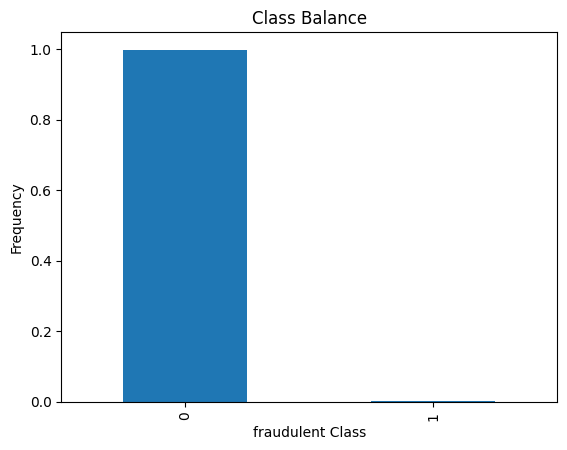

In [ ]:
df['Class'].value_counts(normalize=True).plot(
  kind='bar',
  xlabel='fraudulent Class',
  ylabel='Frequency',
  title='Class Balance'
);

In [ ]:
df['V1'].describe()

count    283726.000000
mean          0.005917
std           1.948026
min         -56.407510
25%          -0.915951
50%           0.020384
75%           1.316068
max           2.454930
Name: V1, dtype: float64

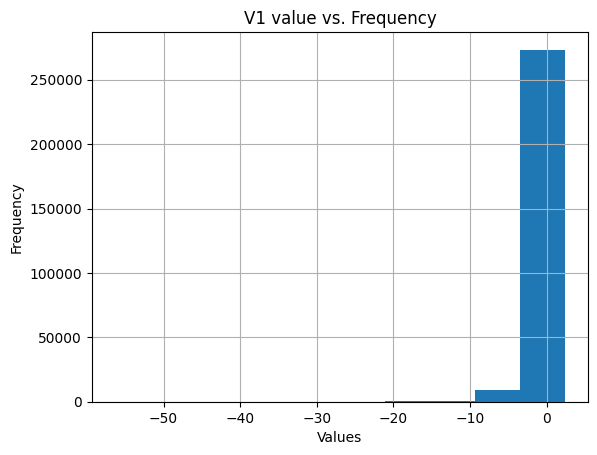

In [ ]:
df['V1'].hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V1 value vs. Frequency');

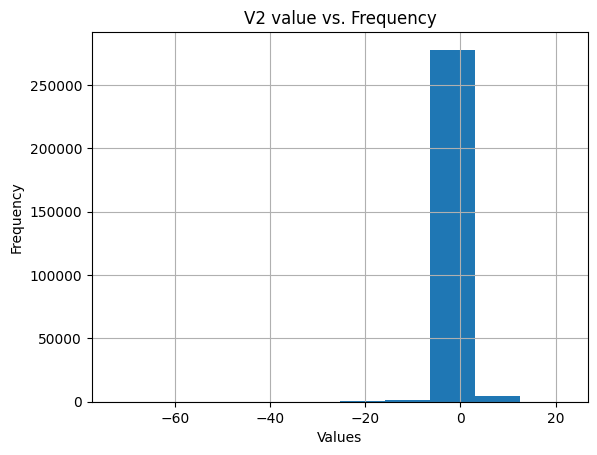

In [ ]:
df['V2'].hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V2 value vs. Frequency');

In [ ]:
features = df.columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
features[1:29]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
for feature in features[1:29]:
  print(df[feature].describe().apply('{0:,.0f}'.format), end='\n\n')

count    283,726
mean           0
std            2
min          -56
25%           -1
50%            0
75%            1
max            2
Name: V1, dtype: object

count    283,726
mean          -0
std            2
min          -73
25%           -1
50%            0
75%            1
max           22
Name: V2, dtype: object

count    283,726
mean           0
std            2
min          -48
25%           -1
50%            0
75%            1
max            9
Name: V3, dtype: object

count    283,726
mean          -0
std            1
min           -6
25%           -1
50%           -0
75%            1
max           17
Name: V4, dtype: object

count    283,726
mean           0
std            1
min         -114
25%           -1
50%           -0
75%            1
max           35
Name: V5, dtype: object

count    283,726
mean          -0
std            1
min          -26
25%           -1
50%           -0
75%            0
max           73
Name: V6, dtype: object

count    283,726
mean           0


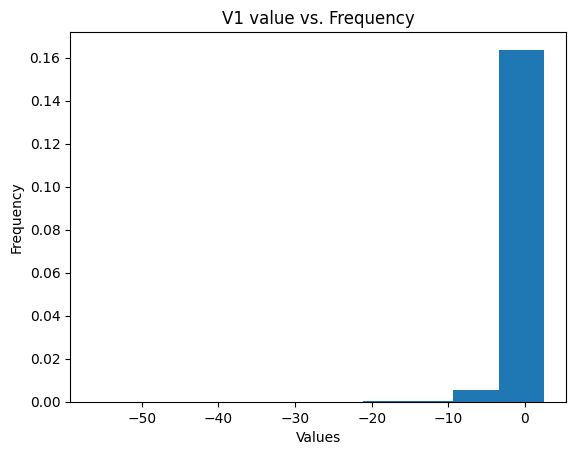

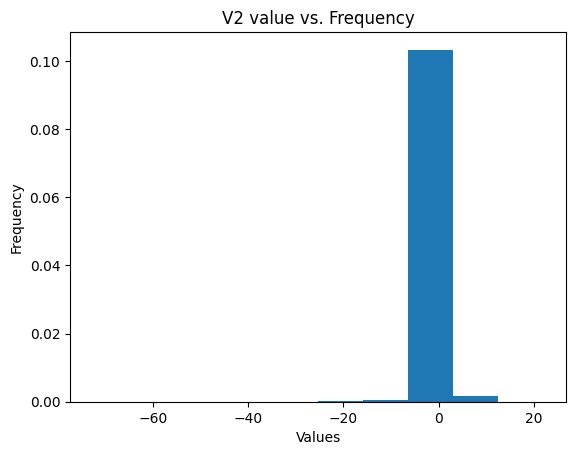

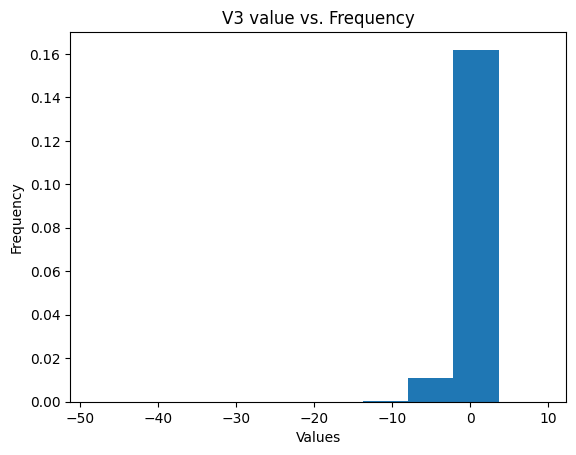

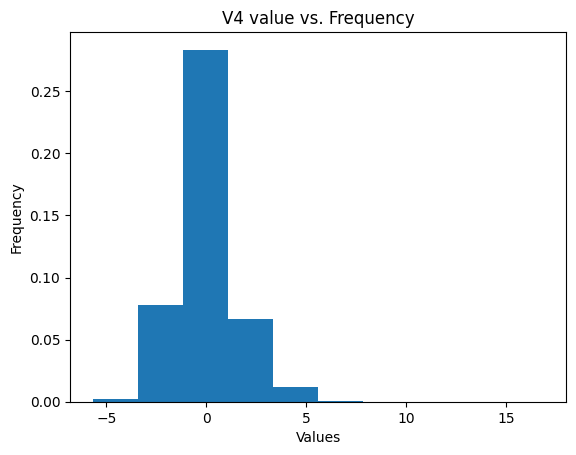

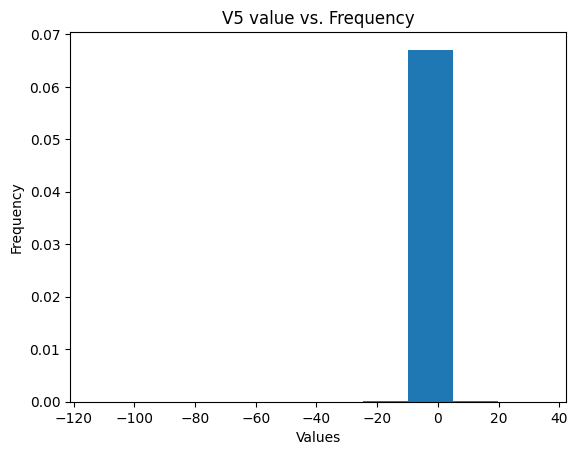

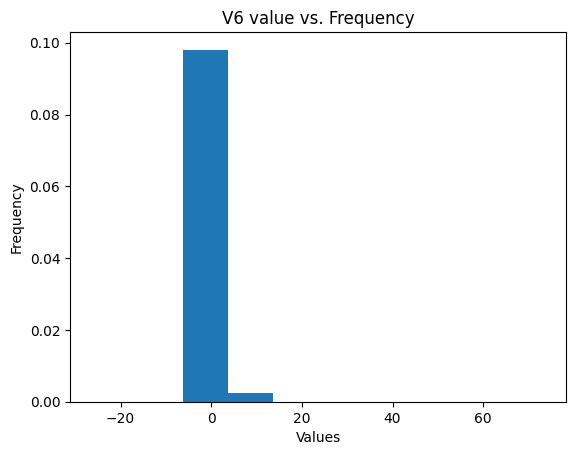

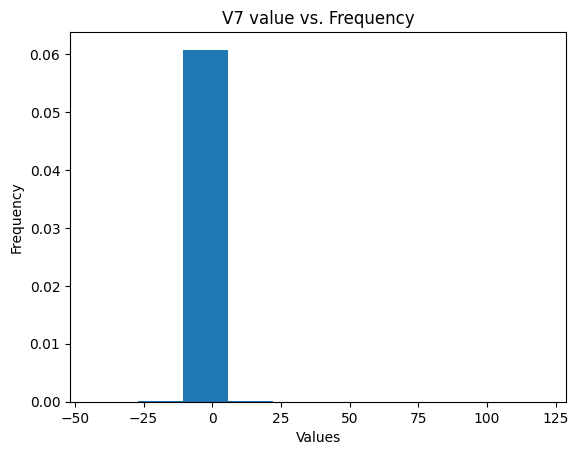

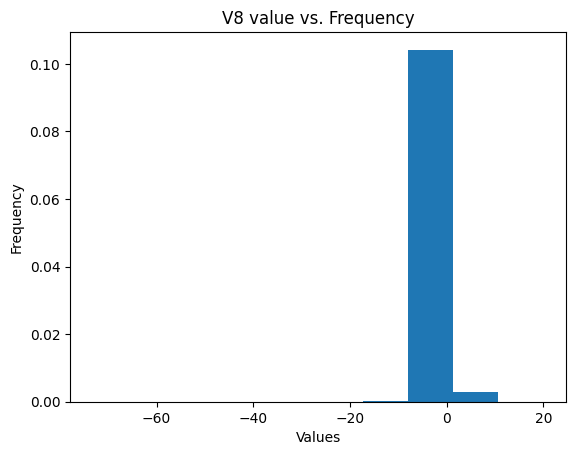

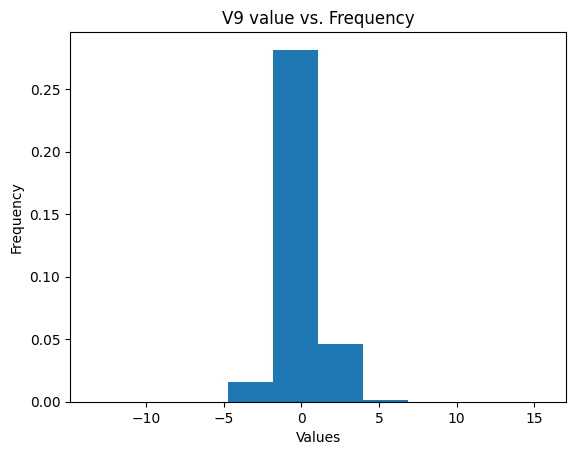

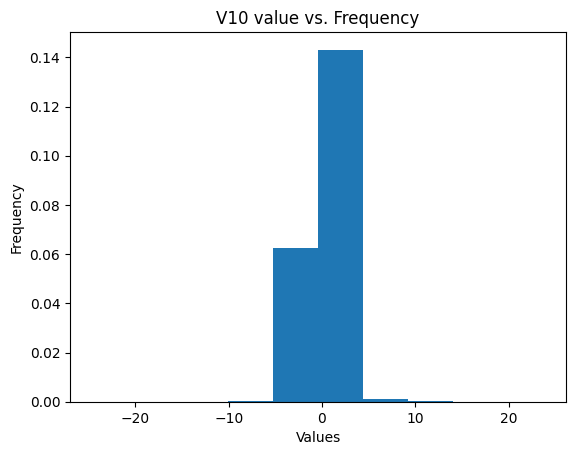

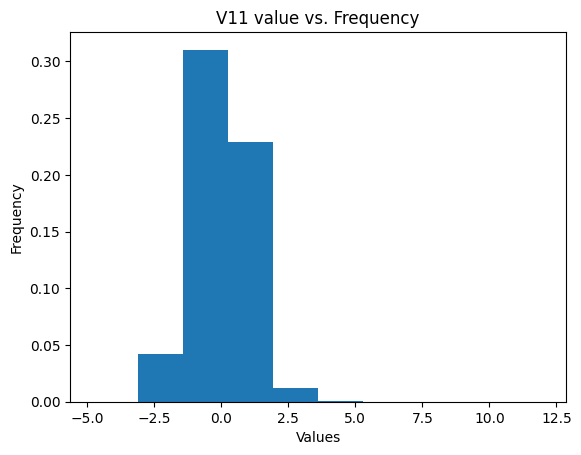

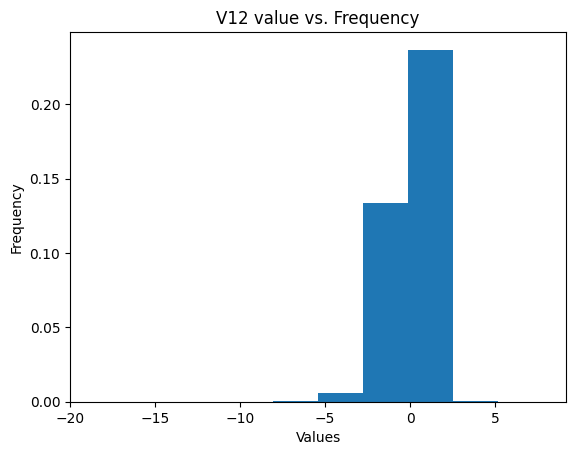

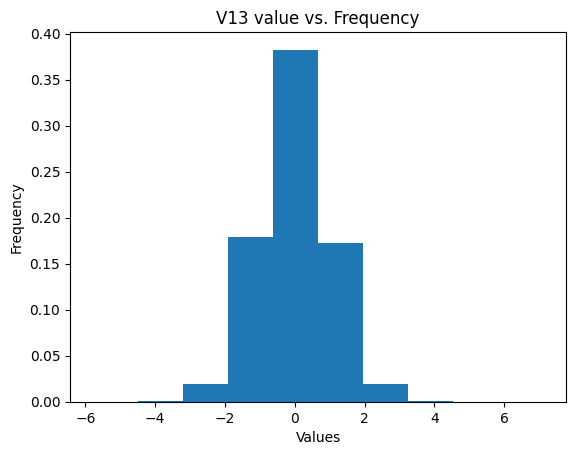

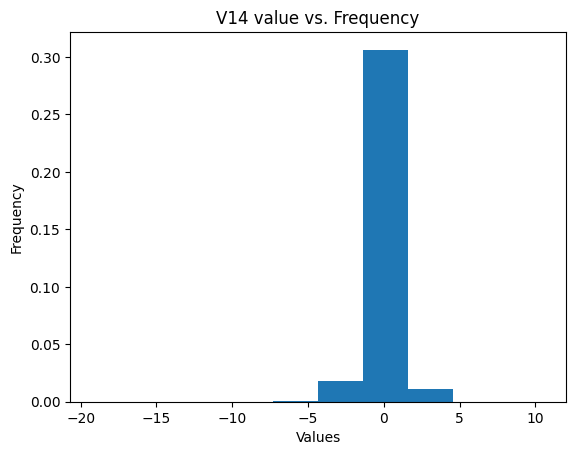

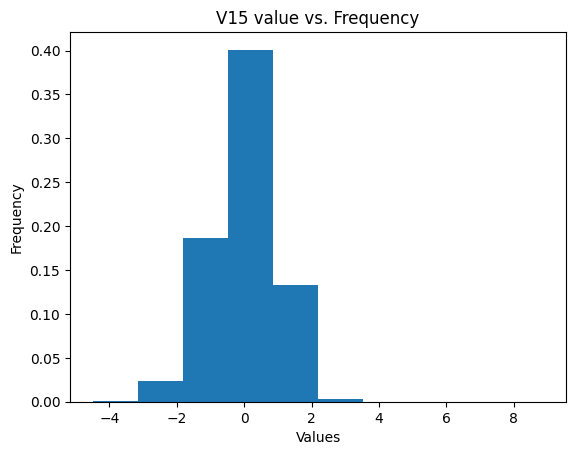

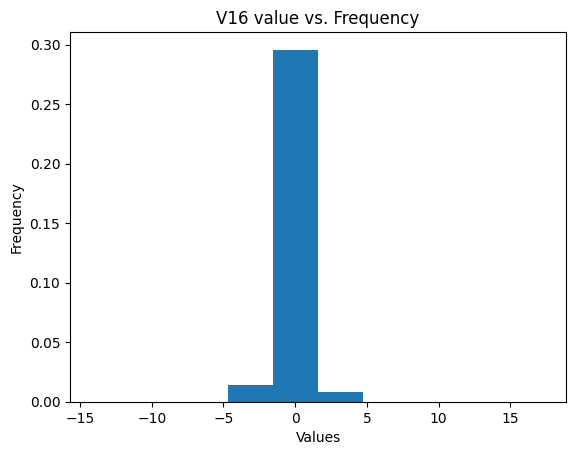

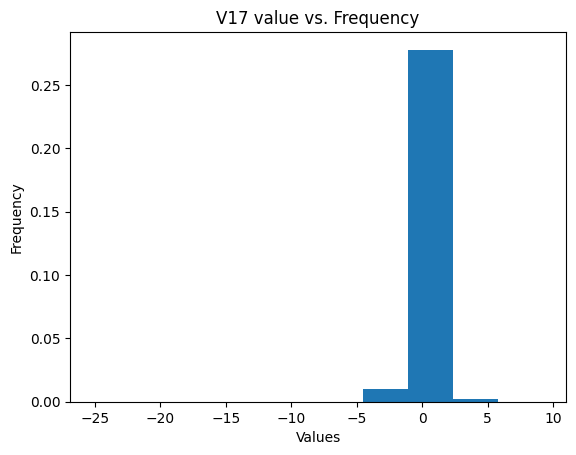

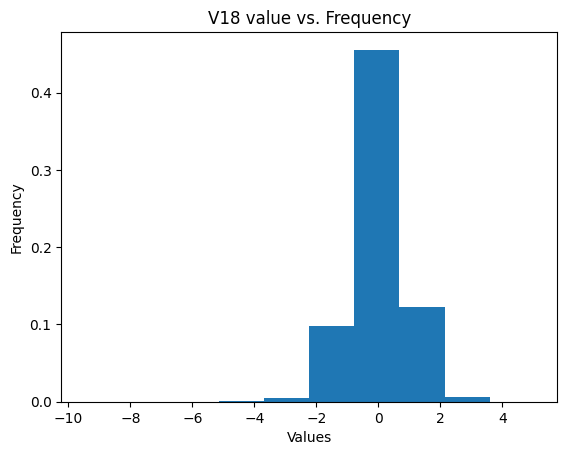

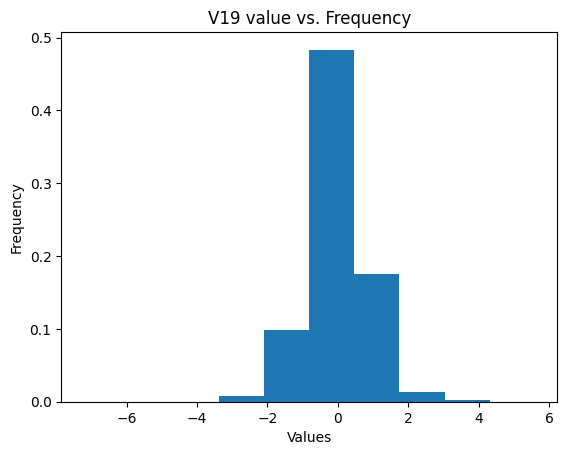

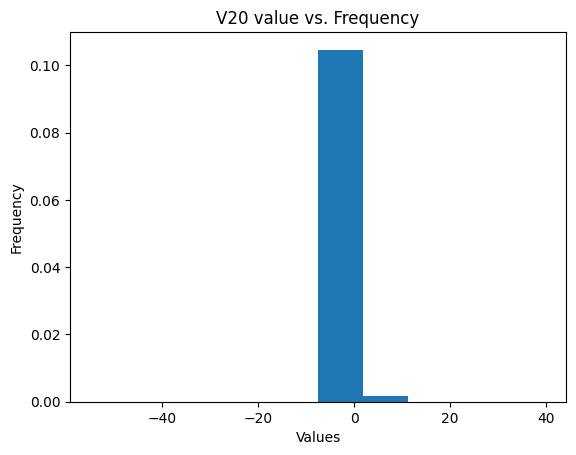

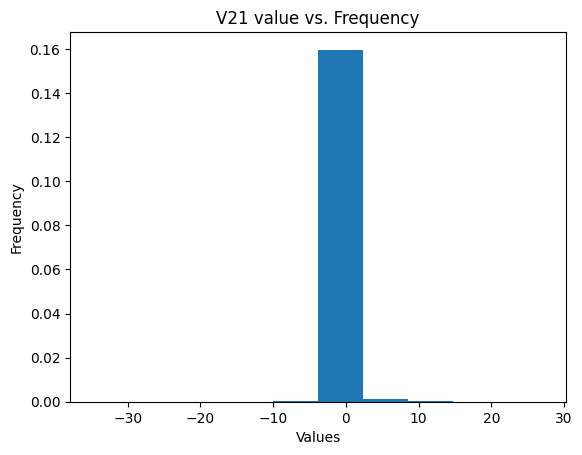

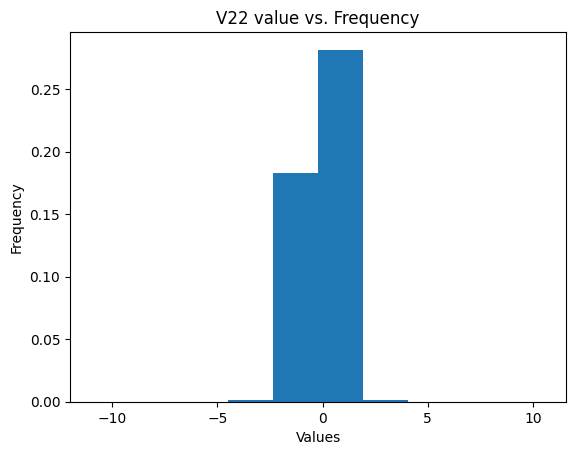

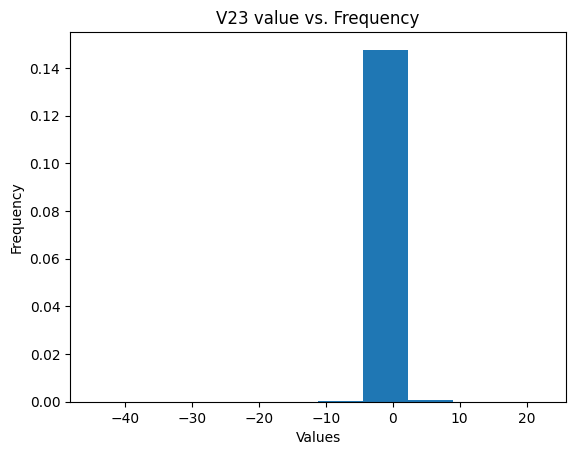

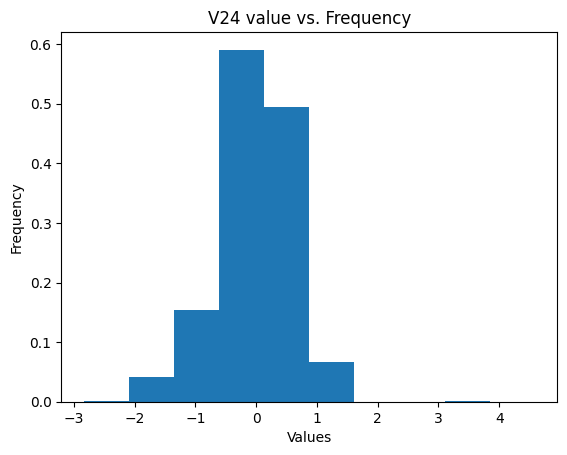

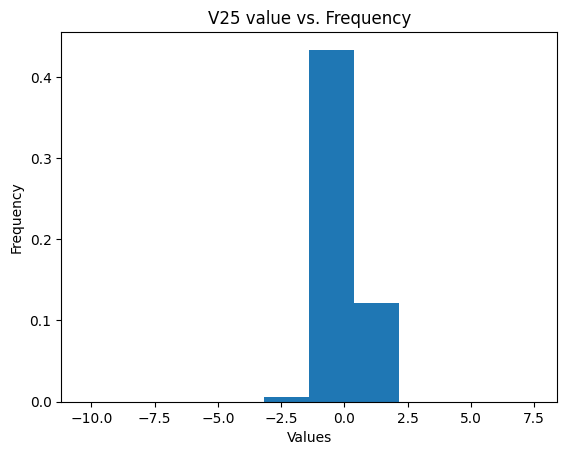

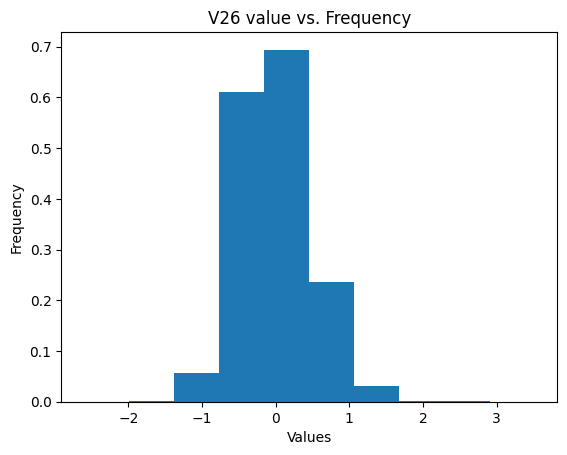

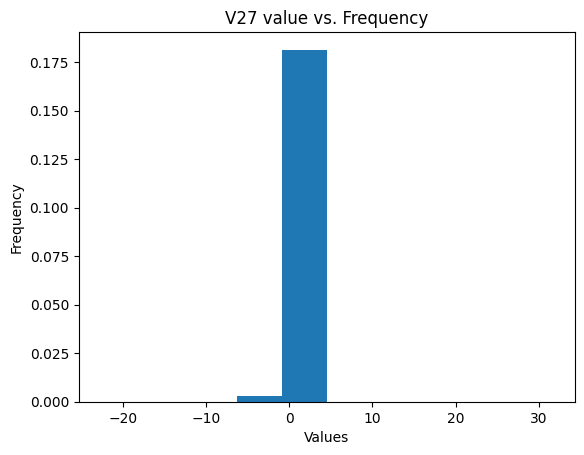

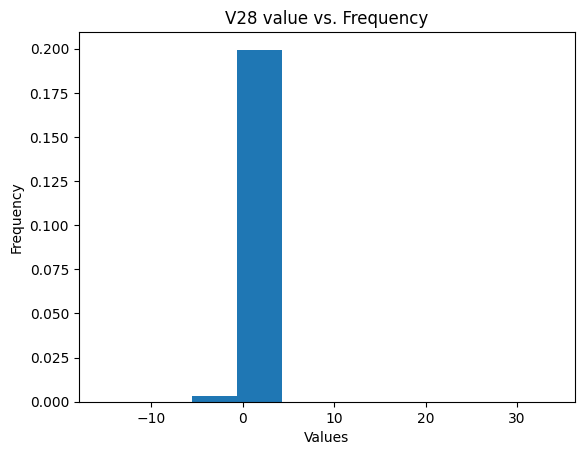

In [ ]:
for feature in features[1:29]:
  plt.hist(df[feature], density=True)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title(f'{feature} value vs. Frequency')
  plt.show();

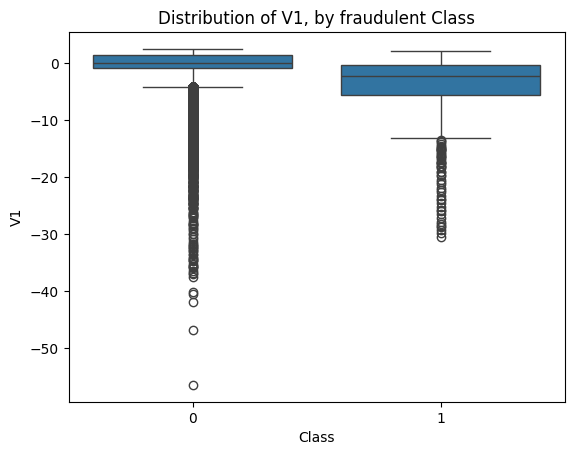

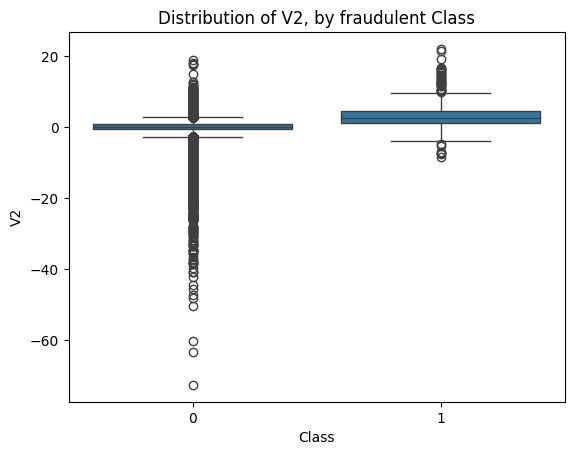

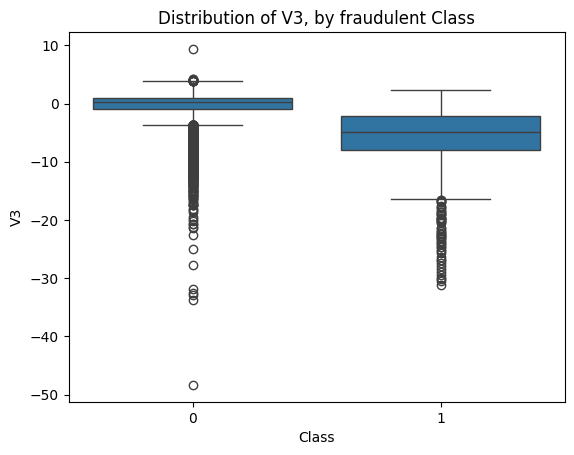

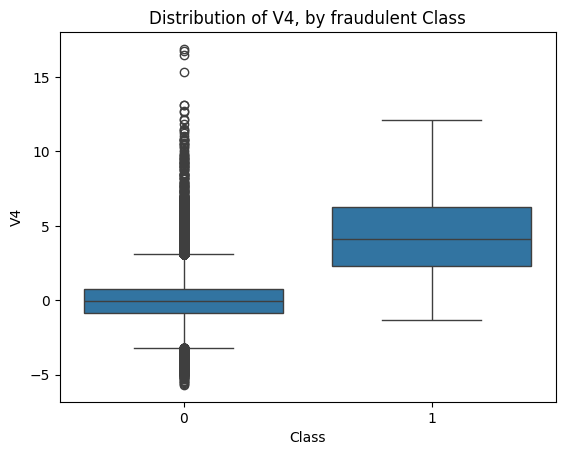

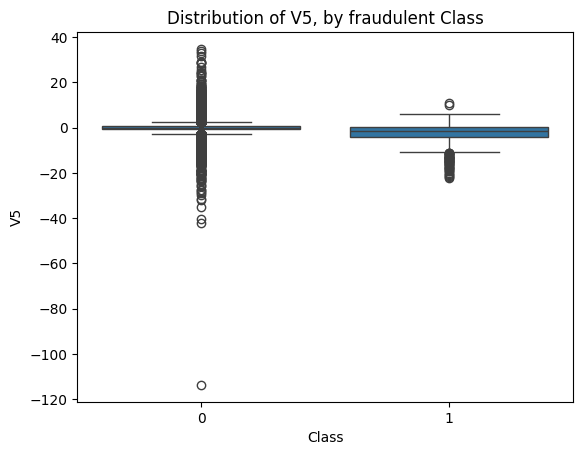

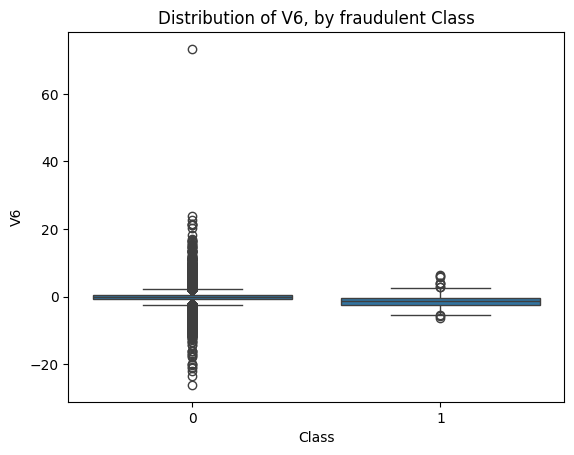

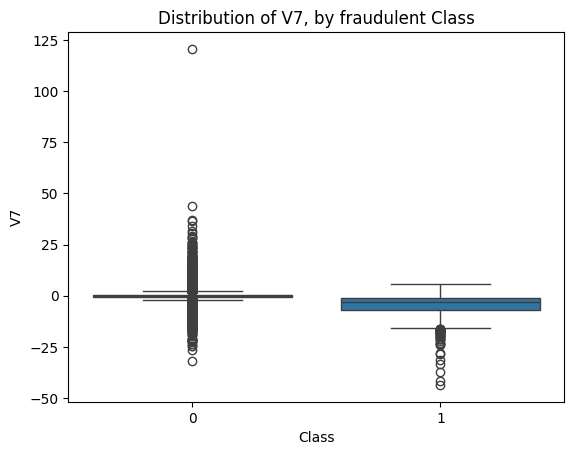

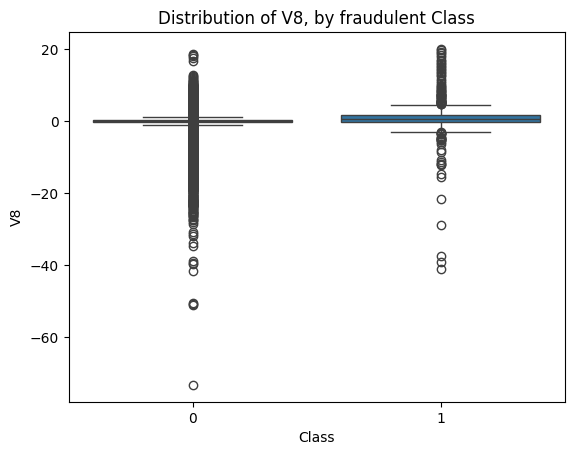

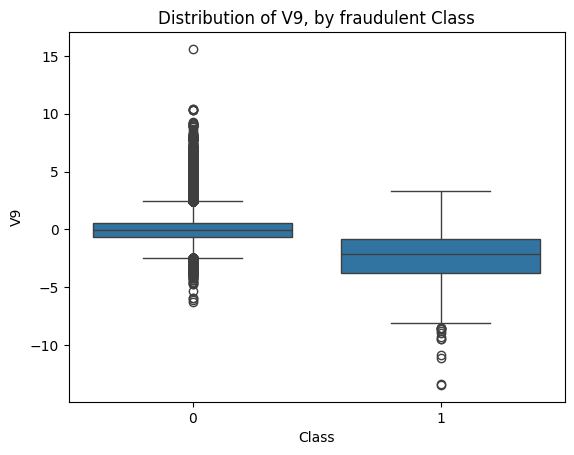

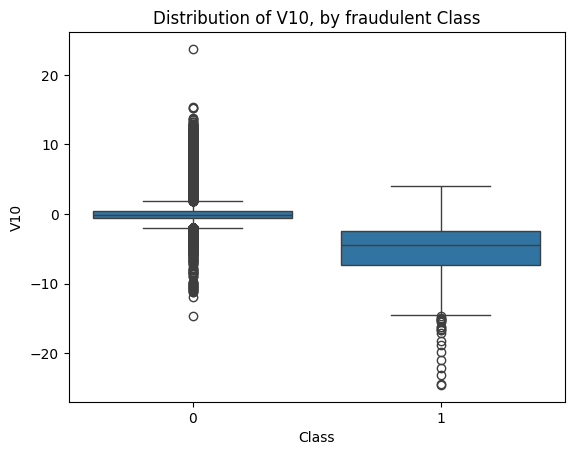

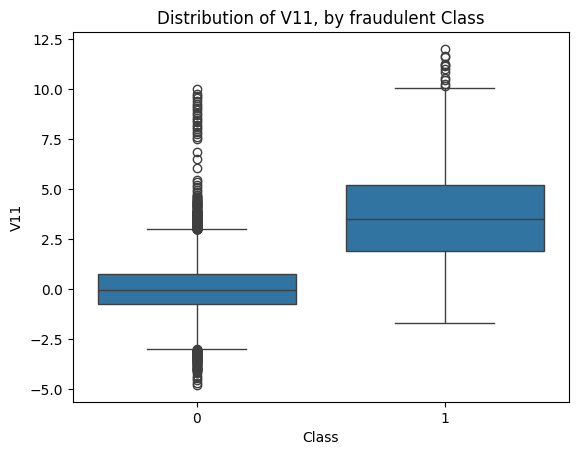

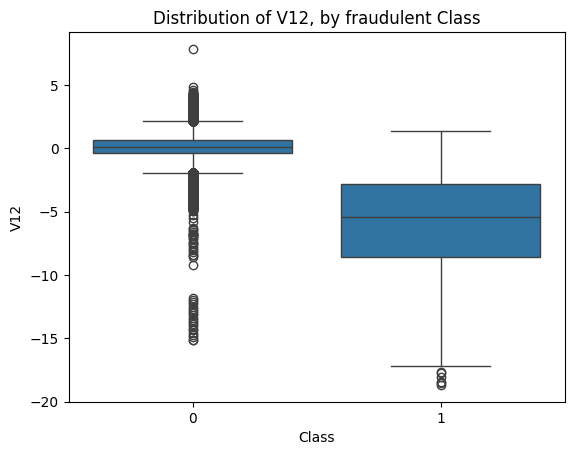

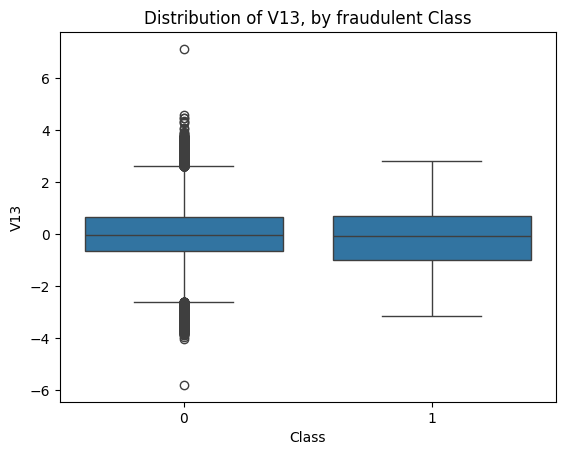

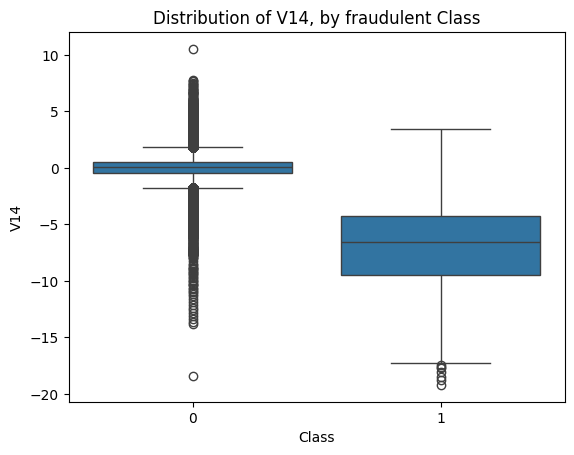

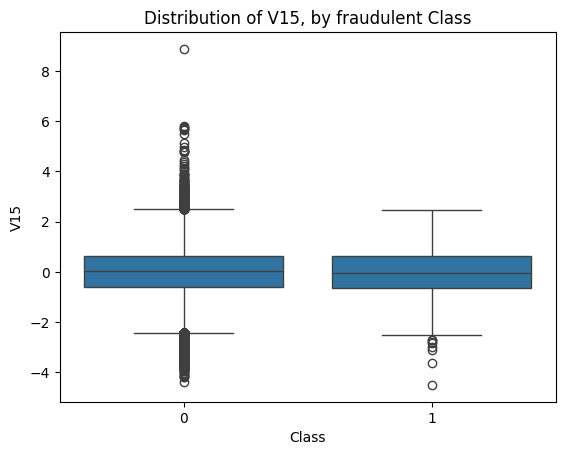

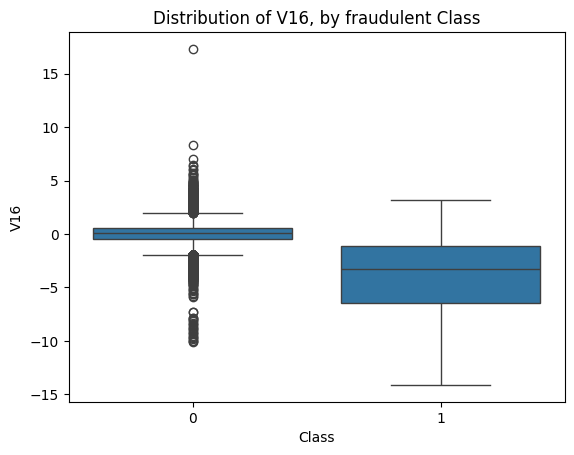

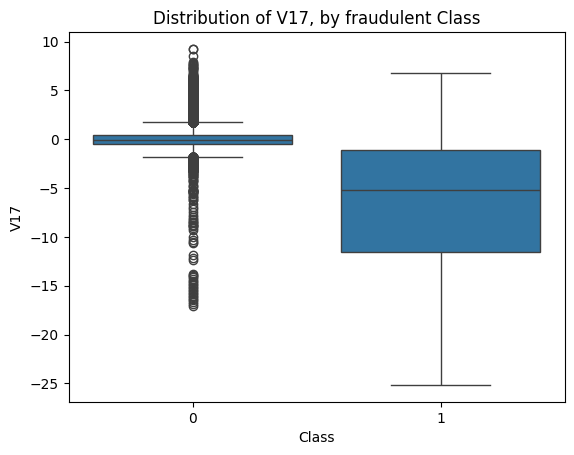

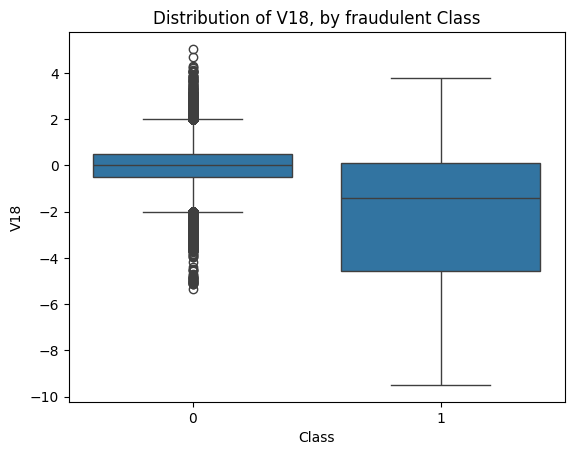

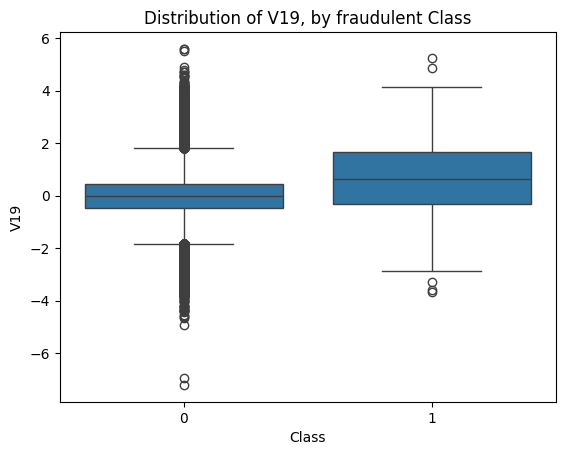

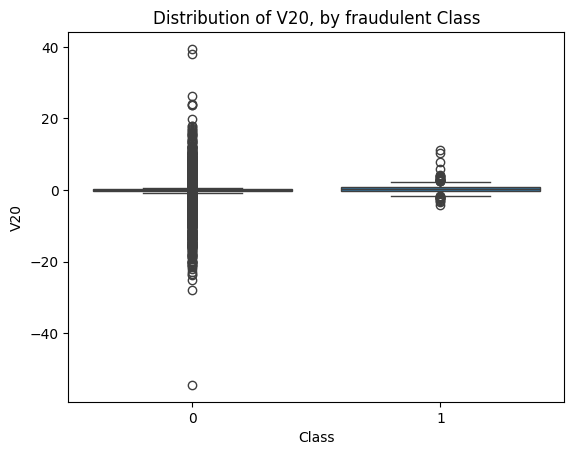

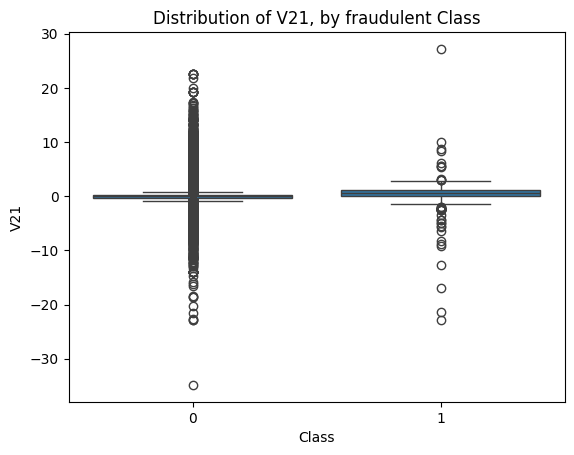

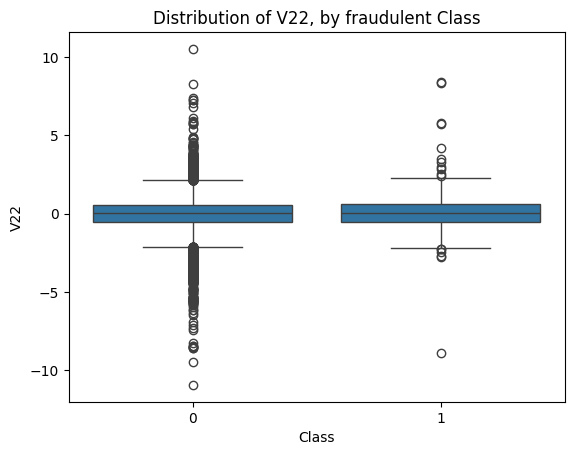

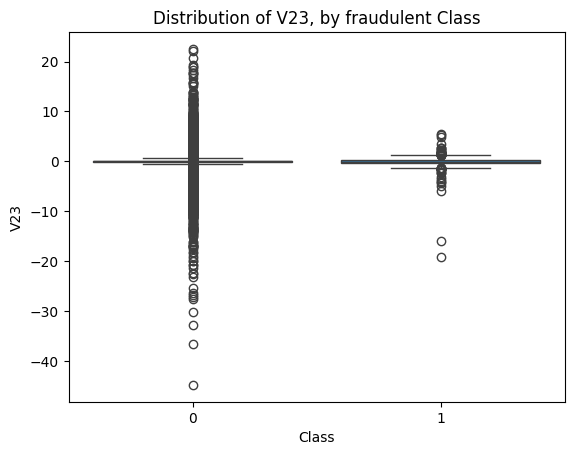

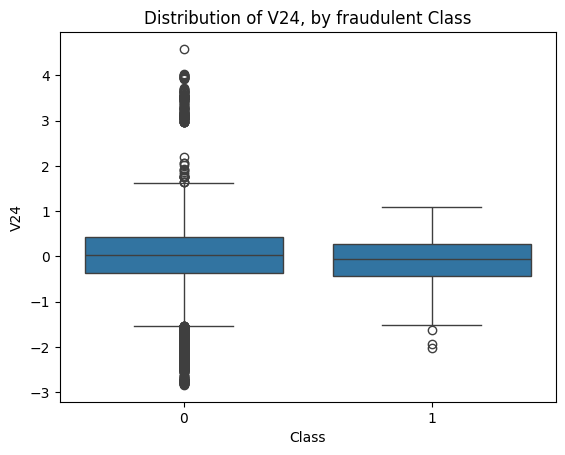

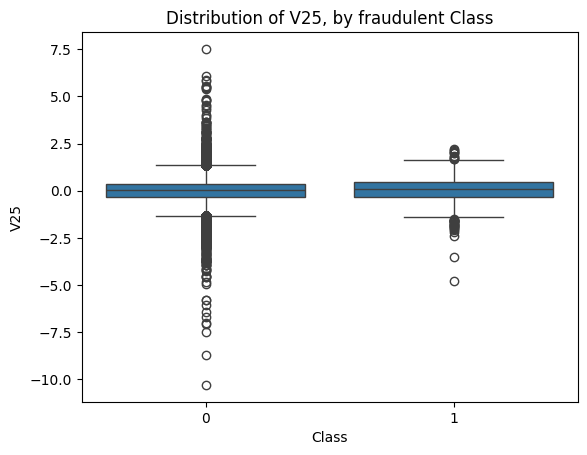

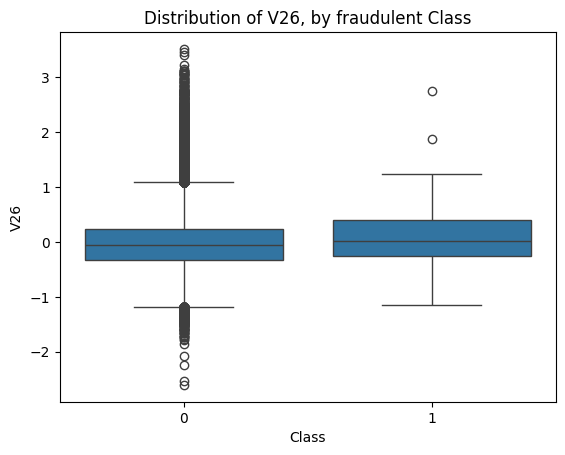

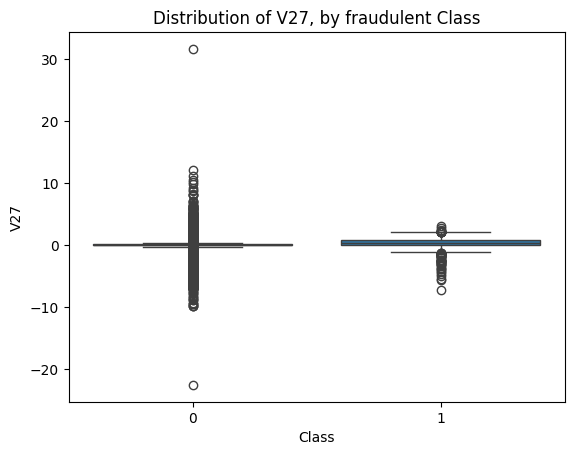

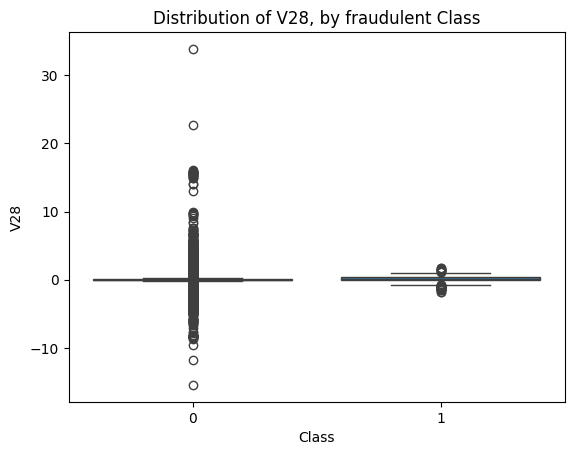

In [ ]:
for feature in features[1:29]:
  sns.boxplot(x='Class', y=feature, data=df)
  plt.xlabel('Class')
  plt.ylabel(feature)
  plt.title(f'Distribution of {feature}, by fraudulent Class')
  plt.show();

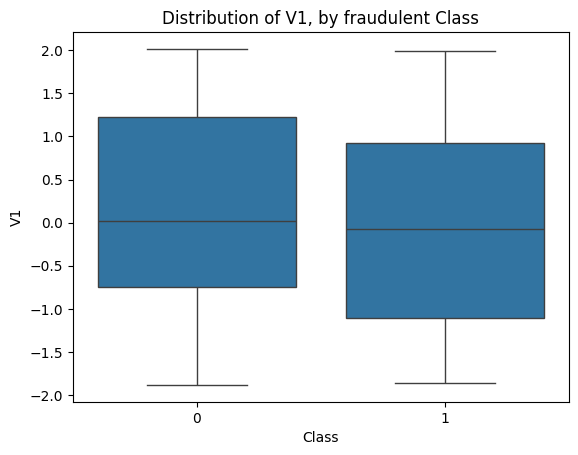

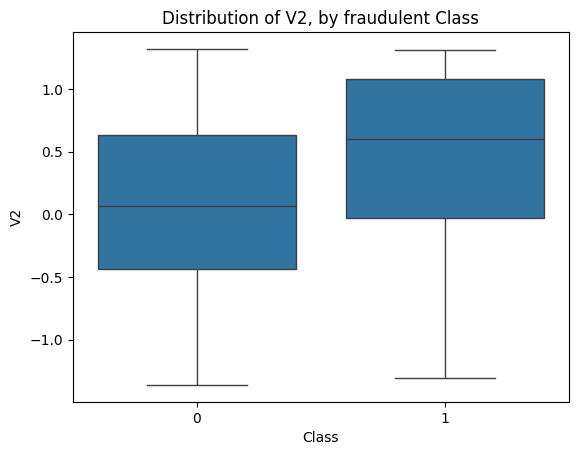

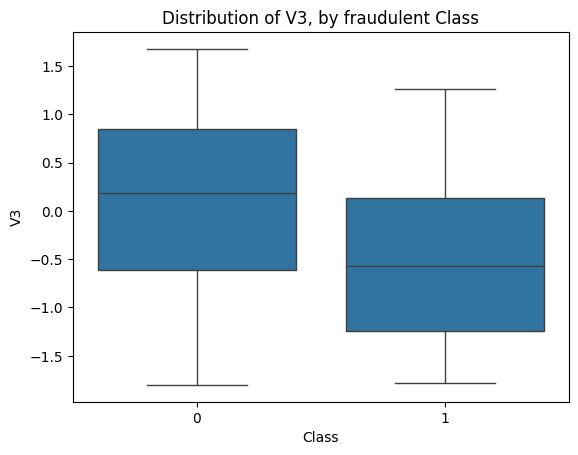

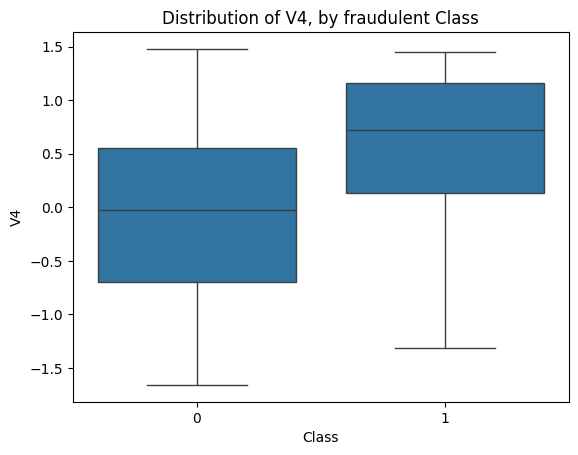

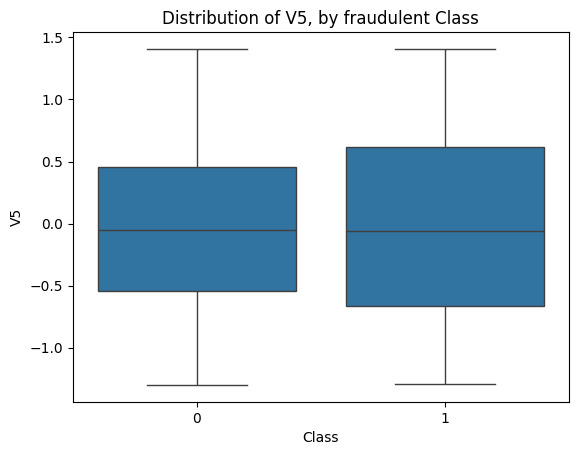

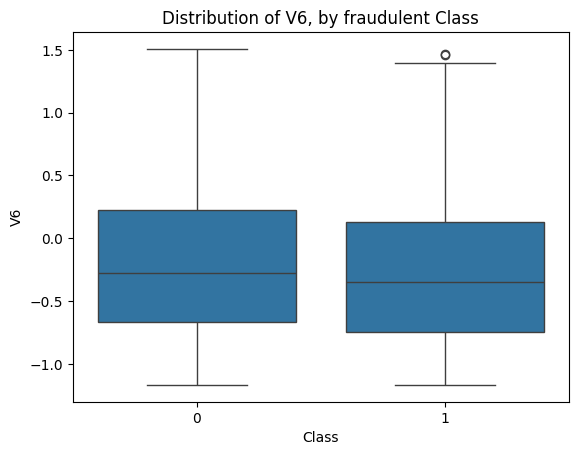

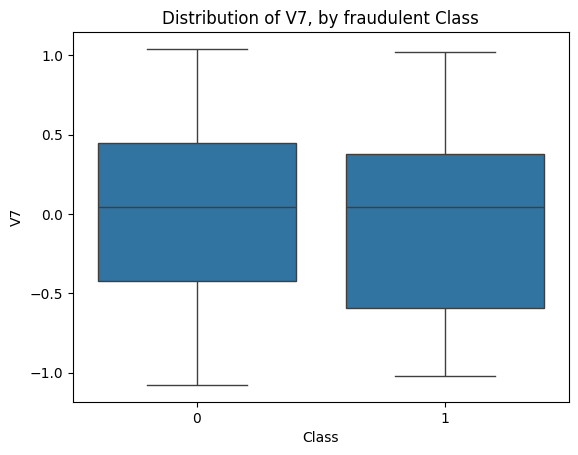

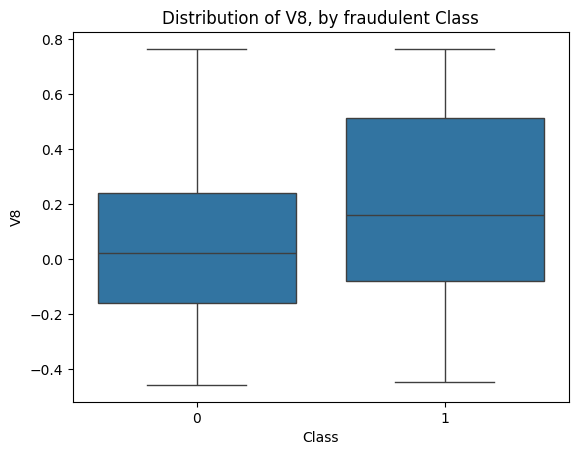

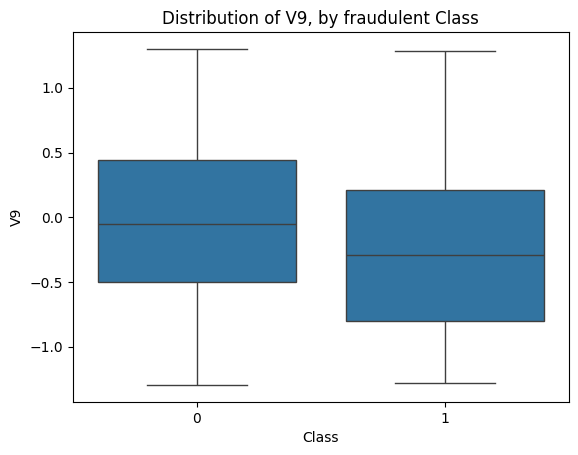

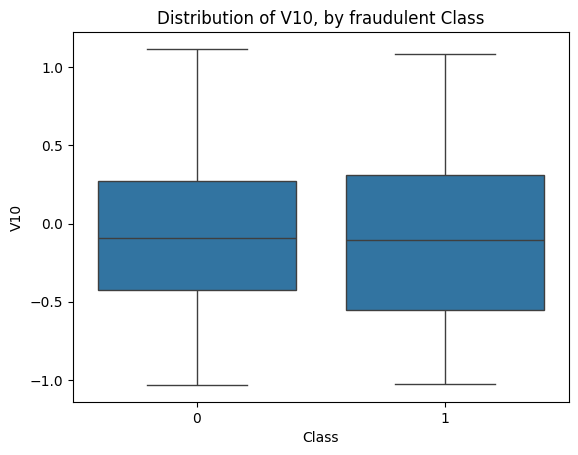

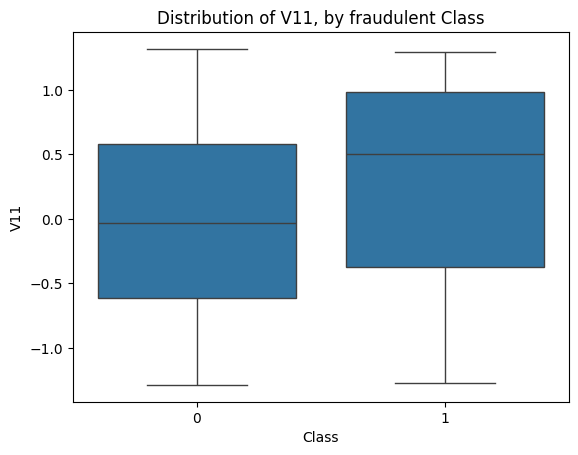

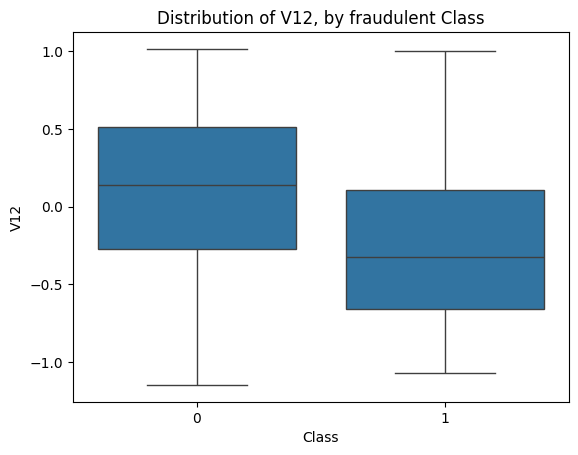

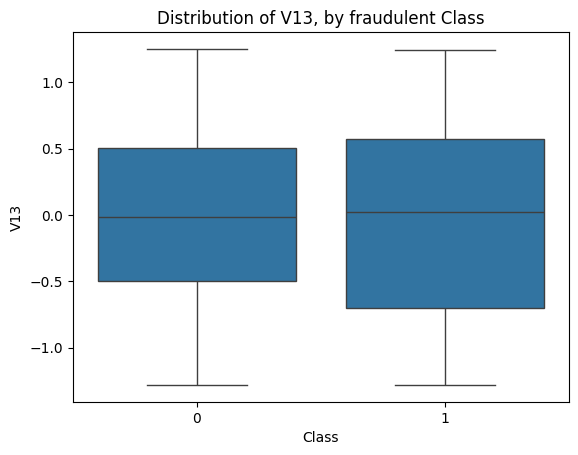

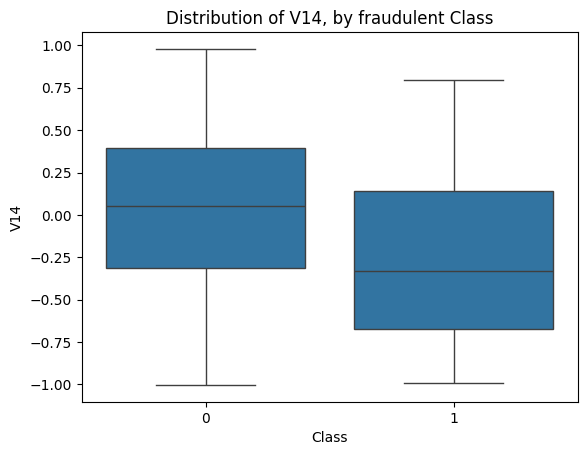

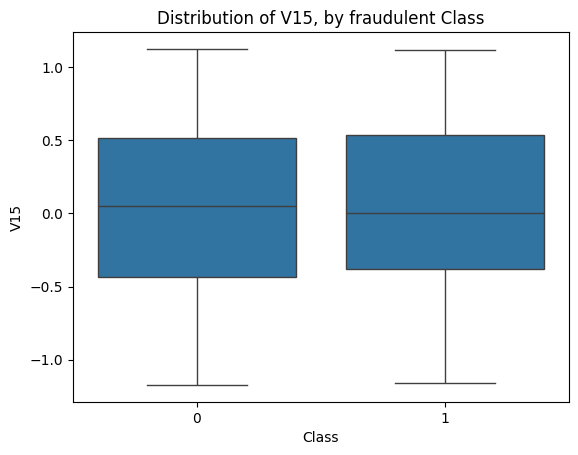

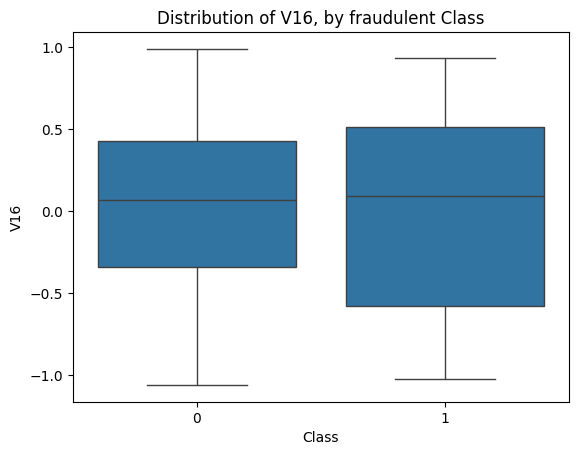

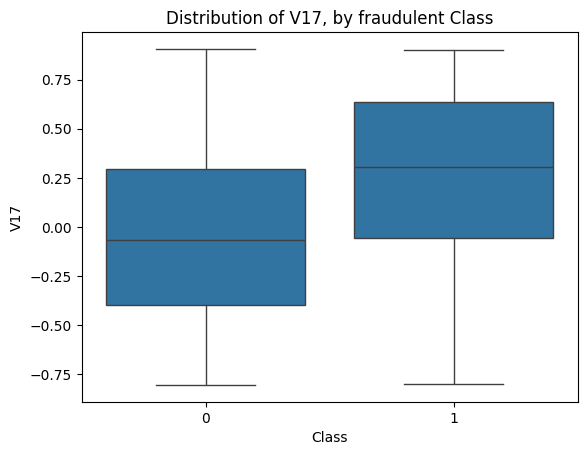

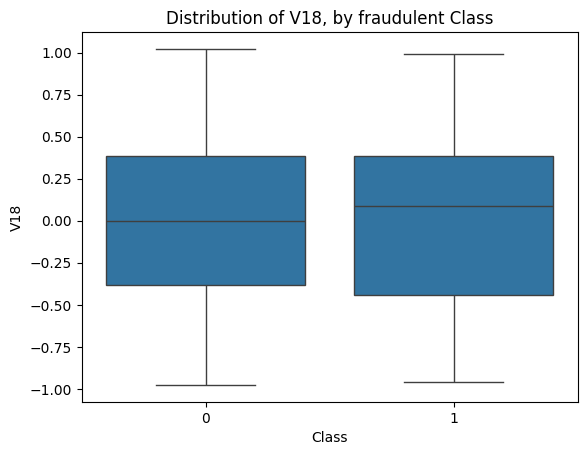

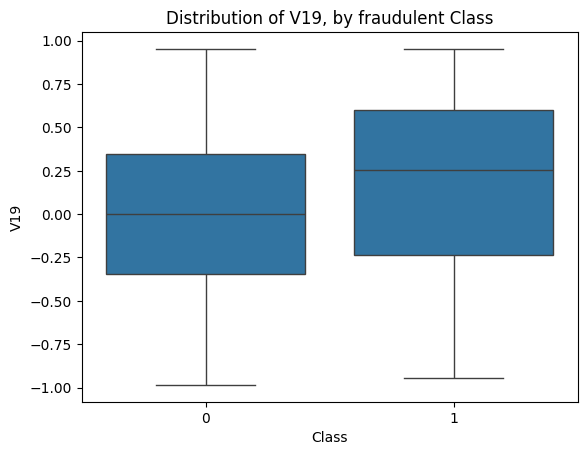

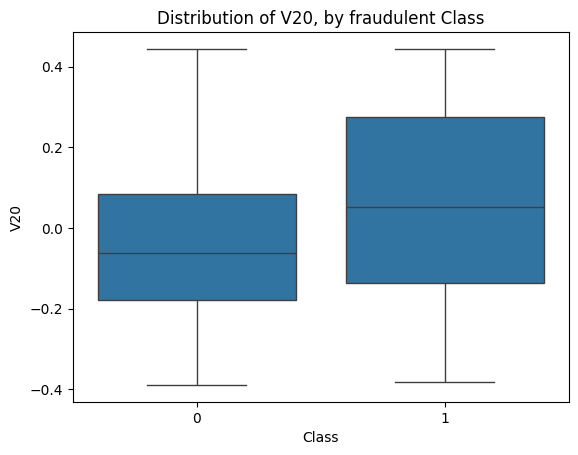

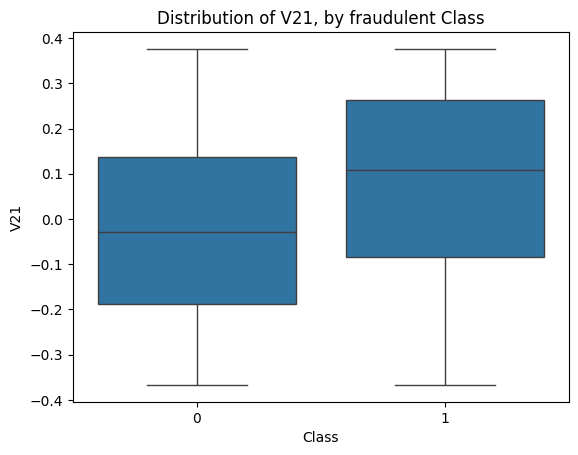

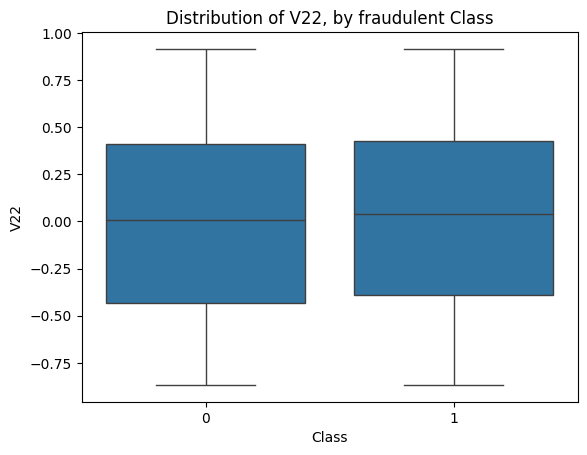

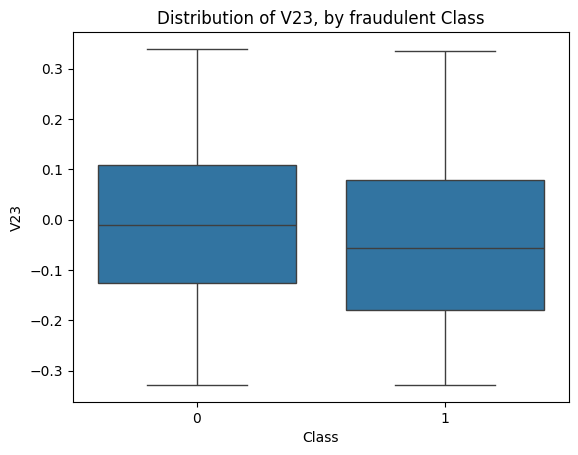

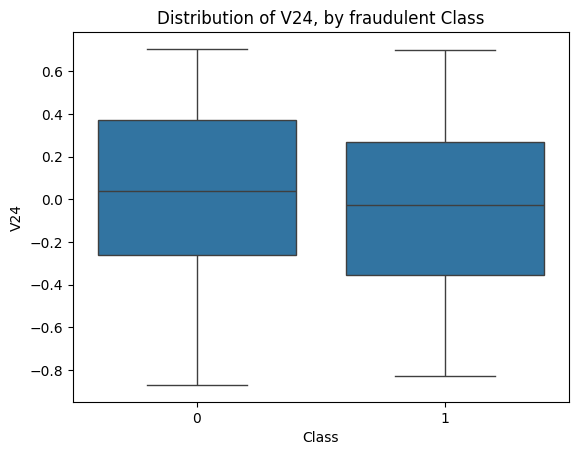

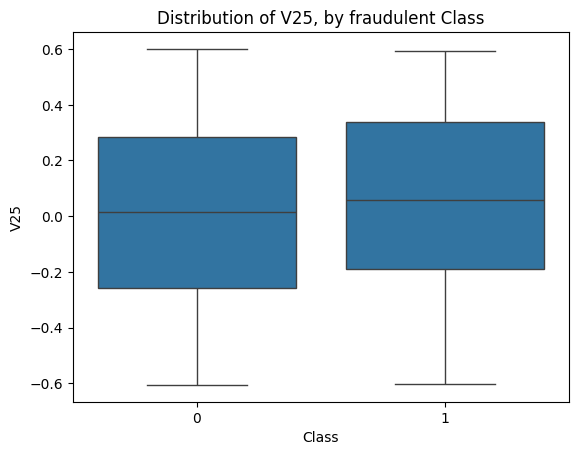

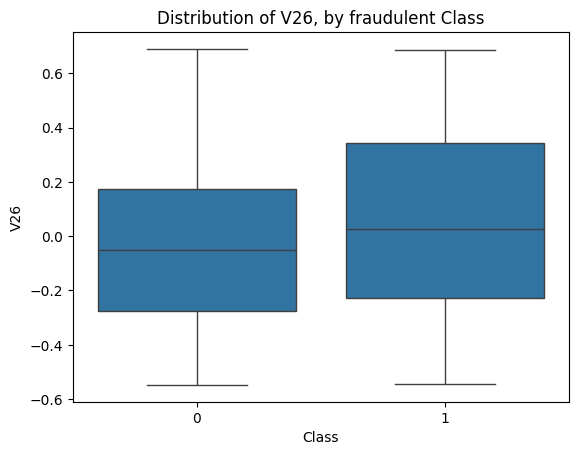

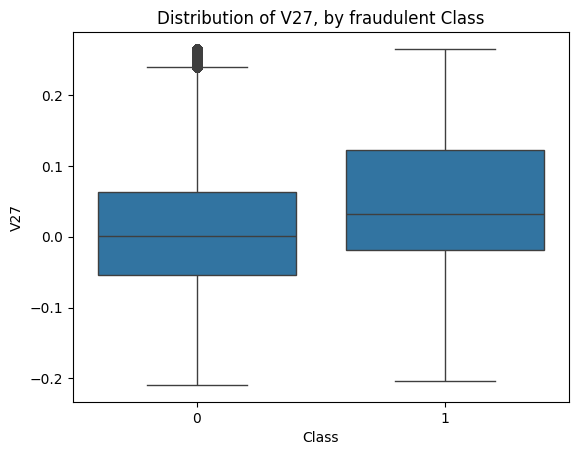

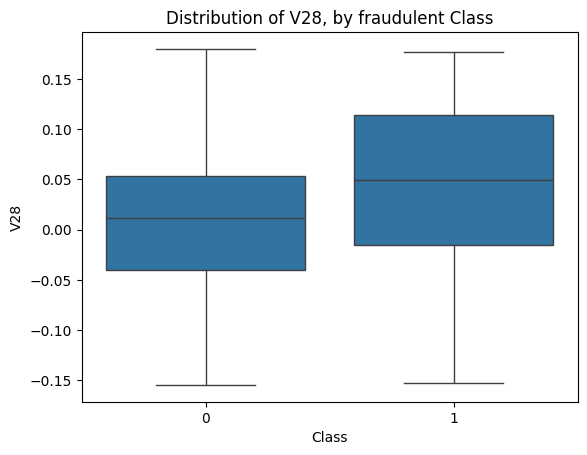

In [ ]:
for feature in features[1:29]:
  q1, q9 = df[feature].quantile([0.1, 0.9])
  mask = df[feature].between(q1, q9)

  sns.boxplot(x='Class', y=feature, data=df[mask]) # df[mask] is a data frame
  plt.xlabel('Class')
  plt.ylabel(feature)
  plt.title(f'Distribution of {feature}, by fraudulent Class')
  plt.show();


In [ ]:
df[mask].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,93943.496537,0.483581,-0.039731,0.016027,0.021460,-0.053971,-0.008589,-0.060927,0.057710,-0.021598,...,-0.008172,-0.037193,0.004909,-0.002977,0.034279,0.007998,0.007203,0.012463,72.028979,0.000674
std,47447.490267,1.395476,1.065640,1.325185,1.314112,1.056896,1.203799,0.835449,0.778828,1.005711,...,0.511621,0.682587,0.341222,0.601240,0.459630,0.480178,0.178373,0.070291,142.967522,0.025954
min,0.000000,-23.663516,-25.005993,-15.076363,-5.519697,-14.977977,-11.847387,-21.570650,-50.420090,-7.368451,...,-22.889347,-8.593642,-44.807735,-2.836627,-10.295397,-1.732917,-4.795874,-0.154626,0.000000,0.000000
25%,53591.000000,-0.620112,-0.620802,-0.892816,-0.785761,-0.716399,-0.747495,-0.574079,-0.178808,-0.633336,...,-0.221575,-0.566772,-0.142112,-0.357014,-0.283596,-0.319055,-0.059307,-0.040139,5.500000,0.000000
50%,82821.000000,1.035581,-0.016764,0.166595,0.052053,-0.121058,-0.281470,-0.016037,0.028355,-0.051006,...,-0.035294,-0.028656,-0.005798,0.038761,0.054899,-0.041214,-0.000462,0.011288,21.830000,0.000000
75%,138718.250000,1.695892,0.638007,0.968852,0.728504,0.498616,0.344986,0.453385,0.304098,0.580830,...,0.165927,0.469926,0.139764,0.432546,0.361596,0.236653,0.064631,0.053495,74.000000,0.000000
max,172792.000000,2.454930,9.770570,4.187811,8.807369,19.440928,11.607923,21.915116,9.673941,5.712470,...,22.614889,7.248763,12.936426,4.022866,3.467907,3.463246,5.002871,0.179793,6000.000000,1.000000


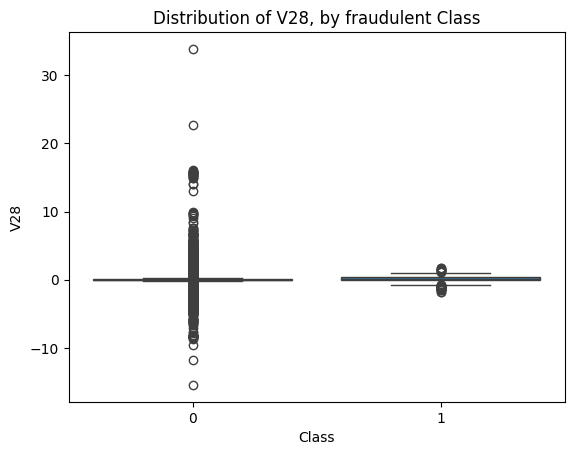

In [ ]:
sns.boxplot(x='Class', y='V28', data=df)
plt.xlabel('Class')
plt.ylabel('V28')
plt.title('Distribution of V28, by fraudulent Class')
plt.show();

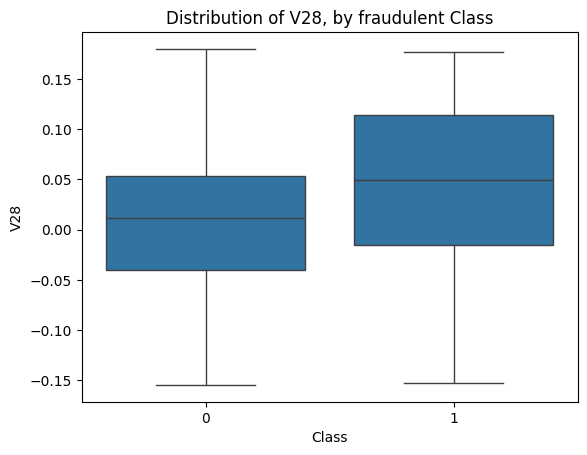

In [ ]:
sns.boxplot(x='Class', y='V28', data=df[mask])
plt.xlabel('Class')
plt.ylabel('V28')
plt.title('Distribution of V28, by fraudulent Class')
plt.show();

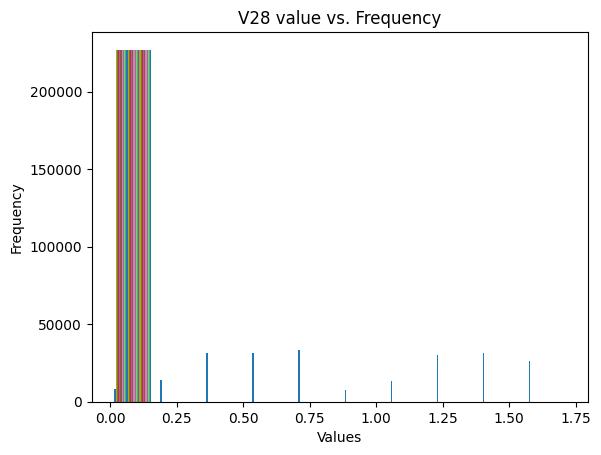

In [ ]:
plt.hist(df[mask] / 1e5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'{feature} value vs. Frequency')
plt.show();

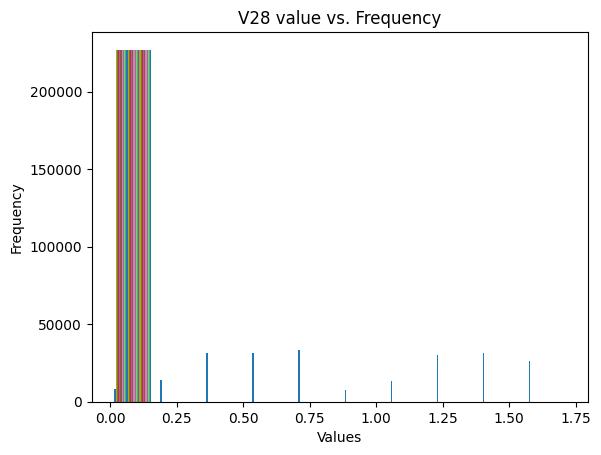

In [ ]:
q1, q9 = df['V28'].quantile([0.1, 0.9])
mask_v28 = df['V28'].between(q1, q9)

plt.hist(df[mask_v28] / 1e5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('V28 value vs. Frequency')
plt.show();

In [ ]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # keep the first occurrence of each duplicate row
  df.drop_duplicates(inplace=True, keep='first')

  # Get the features from `V1` to `V28`
  features = df.columns[1:29]

  # Remove outliers and get the value betweeen 0.1 to 0.9 quantile
  for feature in features:
    q1, q9 = df[feature].quantile([0.1, 0.9])
    quantile_mask = df[feature].between(q1, q9)

  df = df[quantile_mask]

  # Reset index after dropping rows
  df.reset_index(drop=True, inplace=True)

  return df

In [ ]:
df = wrangle('/content/creditcard.csv')
print(df.shape)
df.info()

(226980, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226980 entries, 0 to 226979
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    226980 non-null  float64
 1   V1      226980 non-null  float64
 2   V2      226980 non-null  float64
 3   V3      226980 non-null  float64
 4   V4      226980 non-null  float64
 5   V5      226980 non-null  float64
 6   V6      226980 non-null  float64
 7   V7      226980 non-null  float64
 8   V8      226980 non-null  float64
 9   V9      226980 non-null  float64
 10  V10     226980 non-null  float64
 11  V11     226980 non-null  float64
 12  V12     226980 non-null  float64
 13  V13     226980 non-null  float64
 14  V14     226980 non-null  float64
 15  V15     226980 non-null  float64
 16  V16     226980 non-null  float64
 17  V17     226980 non-null  float64
 18  V18     226980 non-null  float64
 19  V19     226980 non-null  float64
 20  V20     226980 non-null  float64
 2

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,93943.496537,0.483581,-0.039731,0.016027,0.021460,-0.053971,-0.008589,-0.060927,0.057710,-0.021598,...,-0.008172,-0.037193,0.004909,-0.002977,0.034279,0.007998,0.007203,0.012463,72.028979,0.000674
std,47447.490267,1.395476,1.065640,1.325185,1.314112,1.056896,1.203799,0.835449,0.778828,1.005711,...,0.511621,0.682587,0.341222,0.601240,0.459630,0.480178,0.178373,0.070291,142.967522,0.025954
min,0.000000,-23.663516,-25.005993,-15.076363,-5.519697,-14.977977,-11.847387,-21.570650,-50.420090,-7.368451,...,-22.889347,-8.593642,-44.807735,-2.836627,-10.295397,-1.732917,-4.795874,-0.154626,0.000000,0.000000
25%,53591.000000,-0.620112,-0.620802,-0.892816,-0.785761,-0.716399,-0.747495,-0.574079,-0.178808,-0.633336,...,-0.221575,-0.566772,-0.142112,-0.357014,-0.283596,-0.319055,-0.059307,-0.040139,5.500000,0.000000
50%,82821.000000,1.035581,-0.016764,0.166595,0.052053,-0.121058,-0.281470,-0.016037,0.028355,-0.051006,...,-0.035294,-0.028656,-0.005798,0.038761,0.054899,-0.041214,-0.000462,0.011288,21.830000,0.000000
75%,138718.250000,1.695892,0.638007,0.968852,0.728504,0.498616,0.344986,0.453385,0.304098,0.580830,...,0.165927,0.469926,0.139764,0.432546,0.361596,0.236653,0.064631,0.053495,74.000000,0.000000
max,172792.000000,2.454930,9.770570,4.187811,8.807369,19.440928,11.607923,21.915116,9.673941,5.712470,...,22.614889,7.248763,12.936426,4.022866,3.467907,3.463246,5.002871,0.179793,6000.000000,1.000000


In [ ]:
corr = df.drop(columns='Class').corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.200656,-0.046346,-0.507866,-0.100423,0.208886,-0.073694,0.104296,-0.068425,0.018085,...,-0.091273,0.052880,0.129352,0.114554,-0.015759,-0.274500,-0.041507,-0.057115,-0.246673,0.000921
V1,0.200656,1.000000,-0.391211,-0.424502,0.119176,-0.101178,-0.069171,-0.169408,-0.084037,0.205620,...,-0.183808,-0.118126,-0.001033,0.020839,0.010148,0.062166,-0.011746,-0.069054,-0.342624,-0.111543
V2,-0.046346,-0.391211,1.000000,0.073652,0.212364,0.276785,-0.082363,0.279487,-0.026296,-0.066997,...,-0.208304,-0.008266,-0.076781,-0.045298,0.017096,-0.038148,0.002125,0.091707,0.101762,-0.550756
V3,-0.507866,-0.424502,0.073652,1.000000,0.058417,-0.281504,0.012364,-0.076515,0.076157,-0.030408,...,0.034619,-0.024282,-0.001650,-0.068231,0.004670,0.004839,-0.005744,0.166318,0.319632,-0.127551
V4,-0.100423,0.119176,0.212364,0.058417,1.000000,0.029488,0.002580,0.092725,-0.009376,0.110986,...,0.036686,0.008659,0.008540,0.015466,-0.005639,0.038519,-0.010424,-0.021075,-0.010299,0.013603


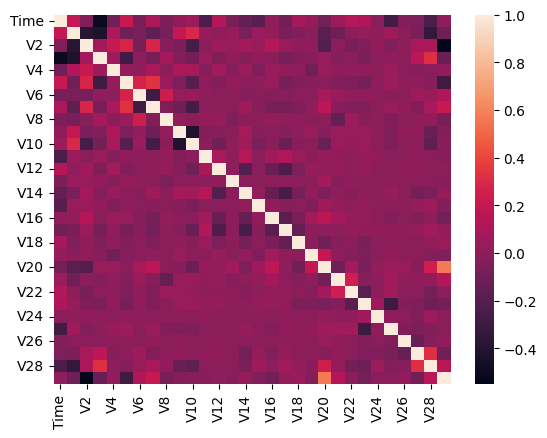

In [ ]:
sns.heatmap(corr); # not much multicollinearity problem

In [ ]:
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
target = 'Class'
X = df.drop(columns=target)
y = df[target]
X.shape

(226980, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(181584, 30)
(181584,)
(45396, 30)
(45396,)


In [ ]:
df.shape

(226980, 31)

In [ ]:
df[target].value_counts()

Class
0    226827
1       153
Name: count, dtype: int64

In [ ]:
df[target].value_counts(normalize=True)

Class
0    0.999326
1    0.000674
Name: proportion, dtype: float64

In [ ]:
X_train.shape

(181584, 30)

In [ ]:
y_train.value_counts()

Class
0    181461
1       123
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
print(y_train_over.shape)
X_train_over.head()

(362922, 30)
(362922,)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76674.0,1.213171,0.344420,0.288867,0.638511,-0.137046,-0.590097,0.045722,-0.095835,-0.052712,...,-0.077639,-0.253684,-0.671583,0.152227,0.048663,0.161419,0.122296,-0.003109,0.028600,1.98
1,93926.0,0.254457,1.183231,-0.277492,0.094997,0.952501,-1.352866,0.992527,-0.481060,0.960146,...,-0.055438,0.173832,0.943121,-0.203119,-0.048215,-0.364737,-0.202576,0.127159,0.129314,4.25
2,131689.0,1.882322,-0.725619,-0.559398,-0.061928,-0.801189,-0.677442,-0.396353,-0.047570,1.250817,...,-0.065397,-0.404059,-1.234030,0.539235,1.143795,-0.842631,0.701031,-0.112394,-0.035050,76.55
3,38709.0,0.441216,-1.872361,0.534848,-1.086876,-0.834288,1.918758,-0.798036,0.686553,2.083799,...,0.382356,0.348338,0.961395,-0.303311,-0.881923,0.200166,0.249430,0.072656,0.046122,300.00
4,26384.0,1.296577,0.262743,0.311986,0.500405,-0.207603,-0.700214,0.073239,-0.192513,0.028810,...,-0.056811,-0.286668,-0.808610,0.071345,-0.110836,0.295388,0.124427,-0.027438,0.014595,1.29


In [ ]:
y_train_over.value_counts()

Class
0    181461
1    181461
Name: count, dtype: int64

In [ ]:
y_train_over.value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
print(y_train_under.shape)
X_train_under.head()

(246, 30)
(246,)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,160981.0,-0.652350,-0.254475,1.412455,1.060214,1.506152,0.349350,0.288036,-0.156316,0.442876,...,0.185102,-0.459832,-0.896074,0.091044,-0.872386,-0.789732,-1.046648,-0.273745,-0.085966,5.20
1,51223.0,-0.857529,0.358979,2.089950,-2.222959,-0.358979,-1.489291,0.698257,-0.170190,0.801438,...,-0.023337,-0.174140,-0.365826,-0.191187,0.962845,0.444778,-0.256329,0.023338,0.065328,9.99
2,59825.0,-0.492975,0.970306,2.227689,2.107296,-0.278505,0.222818,0.275185,0.141475,-0.452103,...,-0.135831,0.149235,0.511241,-0.233510,0.350781,0.084472,0.100806,-0.071146,0.025780,23.90
3,134280.0,-1.277063,-1.021229,0.540929,-0.776090,0.384348,0.706796,-0.308242,0.096831,-0.549730,...,-1.003730,-0.630417,-0.727493,0.598678,-0.366047,-0.791355,-0.502982,0.126487,0.163855,81.82
4,121155.0,0.419265,-3.662387,-3.810651,-0.205017,-0.547960,-1.030358,1.680994,-0.803619,-0.997728,...,1.906867,1.037864,0.749321,-1.089229,0.596653,0.425091,0.181283,-0.294591,0.080652,1000.00


In [ ]:
y_train_under.value_counts()

Class
0    123
1    123
Name: count, dtype: int64

In [ ]:
y_train_over.value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
acc_baseline


0.999322627544277

In [ ]:
acc_baseline_over = y_train_over.value_counts(normalize=True).max()
acc_baseline_over

0.5

In [ ]:
acc_baseline_under = y_train_under.value_counts(normalize=True).max()
acc_baseline_under

0.5

In [ ]:
dt_reg = DecisionTreeClassifier(random_state=42)
dt_reg.fit(X_train, y_train)

dt_over = DecisionTreeClassifier(random_state=42)
dt_over.fit(X_train_over, y_train_over)

dt_under = DecisionTreeClassifier(random_state=42)
dt_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=42)

In [ ]:
# accuracy can't determine the actual performance of the model for imbalance data
for m in [dt_reg, dt_over, dt_under]:
  acc_train = m.score(X_train, y_train)
  acc_test = m.score(X_test, y_test)

  print(f'Training Accuracy: {acc_train}')
  print(f'Test Accuracy: {acc_test}')

Training Accuracy: 1.0
Test Accuracy: 0.9993171204511411
Training Accuracy: 1.0
Test Accuracy: 0.9994713190589479
Training Accuracy: 0.8363181778130232
Test Accuracy: 0.8356903691955239


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

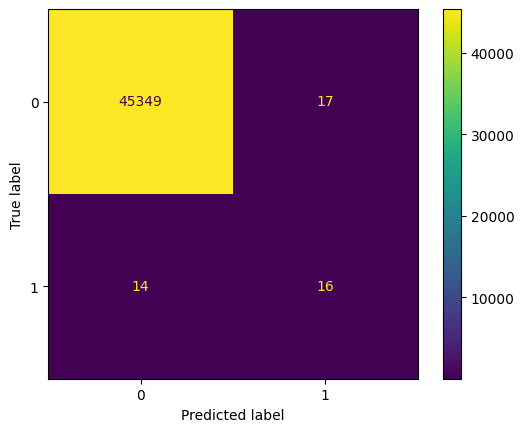

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_reg, X_test, y_test);

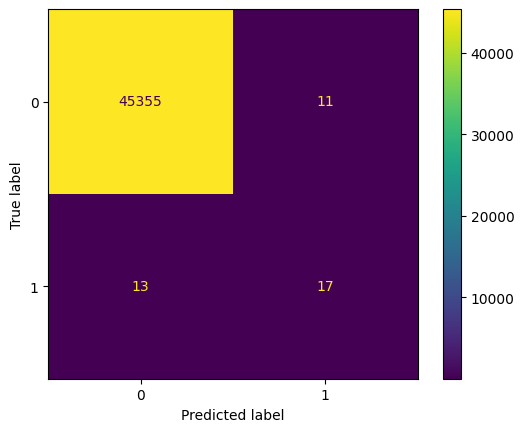

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_over, X_test, y_test); # better performance than regular model


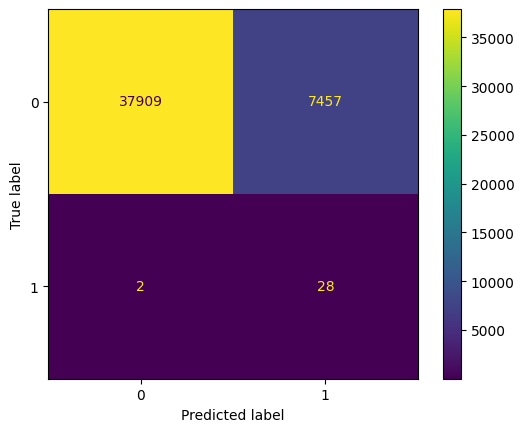

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_under, X_test, y_test); # worse than over and regular model

In [ ]:
depth_reg = dt_reg.get_depth()
depth_reg

23

In [ ]:
depth_under = dt_under.get_depth()
depth_under

8

In [ ]:
depth_over = dt_under.get_depth()
depth_over

8

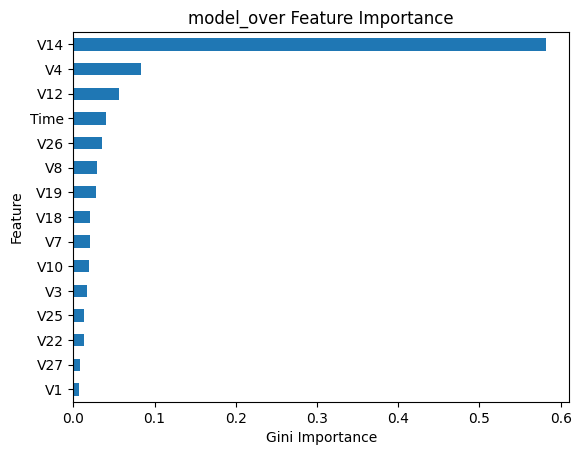

In [ ]:
# Get importances
importances = dt_over.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [ ]:
import pickle

In [ ]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs("model/", exist_ok=True)

# Save model
with open("model/dt_over.pkl", "wb") as f:
    pickle.dump(dt_over, f)

# Load model
with open("model/dt_over.pkl", "rb") as f:
    load_model = pickle.load(f)
print(load_model)


DecisionTreeClassifier(random_state=42)


In [ ]:
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# performs well because accuracy are high and gap is minimal. It means model can generalize
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=2, n_jobs=-1)
cv_acc_scores

array([0.99999449, 0.99998347])

In [ ]:
single_decision_forest_params = {
    "n_estimators": range(25, 100, 25), # How many trees in one forest
    "max_depth": range(10, 50, 10)
}

In [ ]:
rf = GridSearchCV(
    clf,
    param_grid=single_decision_forest_params,
    cv=2, # no of folds in the training dataset
    n_jobs=-1, # give as much resource as you can
    verbose=1 # output to show how the training process has occured
)
rf

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
rf.fit(X_train_over, y_train_over)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
type(rf.cv_results_)

dict

In [ ]:
rf.cv_results_ # hard to read. It would be better to create this dict to dataframe

{'mean_fit_time': array([28.16798115, 44.8364042 , 67.31518519, 24.22346246, 48.71103323,
        73.49366546, 25.32821763, 48.54656971, 72.28784072, 25.61504281,
        47.5481075 , 72.18111491]),
 'std_fit_time': array([0.88642025, 2.66487968, 1.47222722, 0.68524277, 0.71077931,
        0.64585829, 0.06691754, 1.07507098, 0.93777335, 0.06336725,
        0.09086096, 0.88396335]),
 'mean_score_time': array([0.62188661, 1.42052364, 2.37089729, 0.75603247, 1.76189685,
        1.98467112, 0.73866379, 1.95361209, 2.05739081, 0.73143041,
        1.98090243, 1.69088507]),
 'std_score_time': array([5.09274006e-03, 1.68512821e-01, 6.24342442e-01, 4.47988510e-04,
        3.36779594e-01, 2.37393379e-02, 2.59135962e-02, 5.62491179e-01,
        3.62576246e-02, 5.24866581e-03, 5.63665628e-01, 3.67735147e-01]),
 'param_max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False,

In [ ]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,28.167981,0.886420,0.621887,0.005093,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.999355,0.999482,0.999419,0.000063,12
1,44.836404,2.664880,1.420524,0.168513,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.999587,0.999526,0.999556,0.000030,11
2,67.315185,1.472227,2.370897,0.624342,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.999675,0.999620,0.999647,0.000028,10
3,24.223462,0.685243,0.756032,0.000448,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.999956,0.999956,0.999956,0.000000,9
4,48.711033,0.710779,1.761897,0.336780,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.999978,0.999939,0.999959,0.000019,7


In [ ]:
mask = cv_results["param_max_depth"] == 10
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,28.167981,0.886420,0.621887,0.005093,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.999355,0.999482,0.999419,0.000063,12
1,44.836404,2.664880,1.420524,0.168513,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.999587,0.999526,0.999556,0.000030,11
2,67.315185,1.472227,2.370897,0.624342,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.999675,0.999620,0.999647,0.000028,10


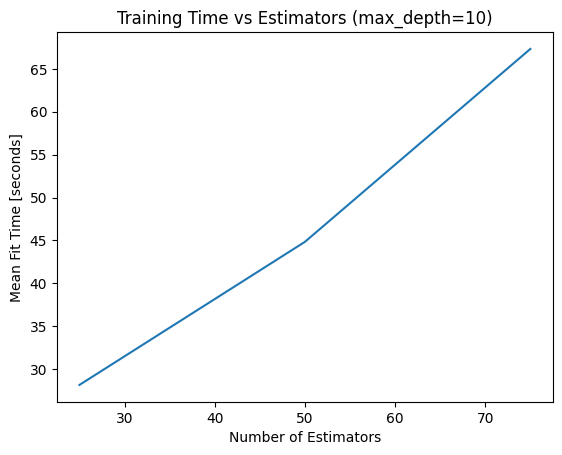

In [ ]:
# `estimator` r 'fit time` has `positive correlation`

mask = cv_results["param_max_depth"] == 10

# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_n_estimators"],
    cv_results[mask]["mean_fit_time"]
)

plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

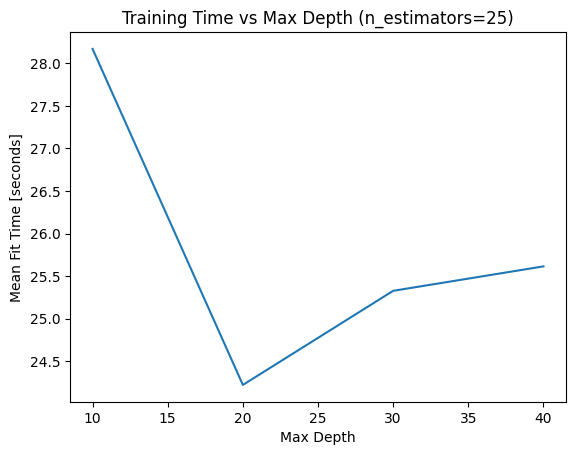

In [ ]:
# 3 params but 2 axis. One param must be constant

mask = cv_results["param_n_estimators"] == 25

# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_max_depth"], # x-axis
    cv_results[mask]["mean_fit_time"] # y-axis
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [ ]:
cv_results[mask][["mean_fit_time", "param_max_depth"]]

,mean_fit_time,param_max_depth
0,28.167981,10
3,24.223462,20
6,25.328218,30
9,25.615043,40


In [ ]:
rf.best_params_

{'max_depth': 30, 'n_estimators': 75}

In [ ]:
# Extract best hyperparameters
rf.best_score_

0.9999917337609734

In [ ]:
rf.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=75)

In [ ]:
# No need to do that
rf.best_estimator_.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# It should be enough
rf.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
rf_acc_train = rf.score(X_train, y_train)
rf_acc_test = rf.score(X_test, y_test)

print("Training Accuracy:", round(rf_acc_train, 4))
print("Test Accuracy:", round(rf_acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9997


In [ ]:
y_test.value_counts()

Class
0    45366
1       30
Name: count, dtype: int64

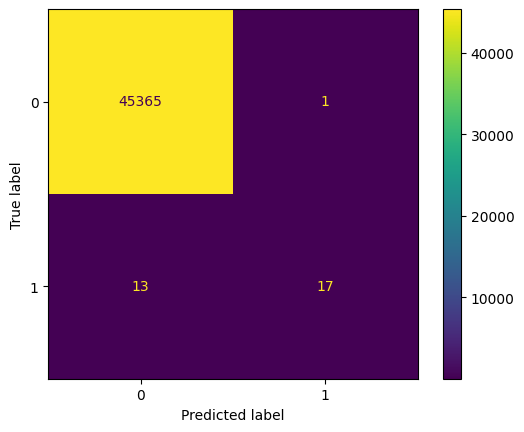

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test);

In [ ]:
features = X_train_over.columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
importances = rf.best_estimator_.feature_importances_
importances

array([0.01024325, 0.01166086, 0.02685391, 0.03738048, 0.13100715,
       0.0156604 , 0.01261465, 0.03836933, 0.01900794, 0.01058131,
       0.08829958, 0.06511256, 0.04639164, 0.01203895, 0.17573096,
       0.00991364, 0.02918957, 0.06809217, 0.02340562, 0.0301861 ,
       0.01864145, 0.01678287, 0.00834435, 0.01411785, 0.00946576,
       0.00864093, 0.0185908 , 0.01608559, 0.01224655, 0.0153438 ])

In [ ]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp

V22       0.008344
V25       0.008641
V24       0.009466
V15       0.009914
Time      0.010243
V9        0.010581
V1        0.011661
V13       0.012039
V28       0.012247
V6        0.012615
V23       0.014118
Amount    0.015344
V5        0.015660
V27       0.016086
V21       0.016783
V26       0.018591
V20       0.018641
V8        0.019008
V18       0.023406
V2        0.026854
V16       0.029190
V19       0.030186
V3        0.037380
V7        0.038369
V12       0.046392
V11       0.065113
V17       0.068092
V10       0.088300
V4        0.131007
V14       0.175731
dtype: float64

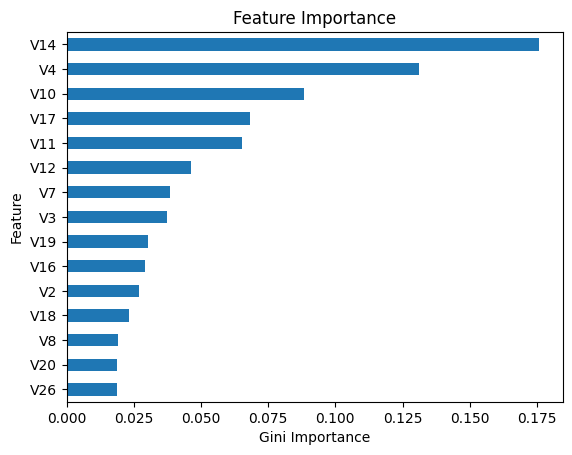

In [ ]:
# Plot 15 most important features
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
# Save model
with open("model/rf_over.pkl", "wb") as f:
    pickle.dump(rf, f)

# Load model
with open("model/rf_over.pkl", "rb") as f:
    load_rf_model = pickle.load(f)
print(load_rf_model)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
gbc_clf = GradientBoostingClassifier()

In [ ]:
# Params are small to reduce training time
params = {
    "n_estimators": range(20, 31, 5), # How many trees in one forest
    "max_depth": range(2, 5)
}

In [ ]:
gbc = GridSearchCV(
    gbc_clf,
    param_grid=params,
    cv=2, # no of folds in the training dataset
    n_jobs=-1, # give as much resource as you can
    verbose=1 # output to show how the training process has occured
)

In [ ]:
gbc.fit(X_train_over, y_train_over)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

In [ ]:
# `accuracy/mean test score` of gradient boosting is lower than random forest
# `mean fit time` of gradient boosting is higher than random forest
results = pd.DataFrame(gbc.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,67.466792,0.510012,0.206227,0.012311,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.906283,0.904117,0.905200,0.001083,9
1,94.845189,0.835172,0.629762,0.036412,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.912086,0.921680,0.916883,0.004797,8
2,90.792654,0.953548,0.311234,0.015130,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.928789,0.938146,0.933468,0.004679,7
3,64.659067,1.084756,0.384588,0.042574,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.964720,0.957214,0.960967,0.003753,6
4,77.148698,0.324167,0.223250,0.001015,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.975196,0.975383,0.975289,0.000094,5


In [ ]:
# Extract best hyperparameters
gbc.best_params_

{'max_depth': 4, 'n_estimators': 30}

In [ ]:
gbc.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=30)

In [ ]:
gbc.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
gbc_acc_train = gbc.score(X_train, y_train)
gbc_acc_test = gbc.score(X_test, y_test)

print("Training Accuracy:", round(gbc_acc_train, 4))
print("Validation Accuracy:", round(gbc_acc_test, 4))

Training Accuracy: 0.9849
Validation Accuracy: 0.9851
